# Imports

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import pylab as pl
from pandas.plotting import scatter_matrix
from scipy import stats, integrate
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from scipy.stats import boxcox
from sklearn.decomposition import PCA
from sklearn import mixture
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
from scipy import interp

C:\Users\or\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Data Exploration

In [2]:
# Read the CSV file
"REMEMBER to change it to 'train.csv' and 'test_no_target.csv' before submitting"
df_train = pd.read_csv("train.csv")
x_test = pd.read_csv("test_no_target.csv")

##### Find the two most common classes

In [3]:
num_of_classes = 2 # The amount of classes for a binary problem
df_class_count = df_train.groupby('target')['target'].count().reset_index(name="count")
df_largest = df_class_count.nlargest(num_of_classes, 'count').reset_index(drop=True)
print df_largest
first_class_name = df_largest['target'][0]
second_class_name = df_largest['target'][1]
print "The first most coomon class is:",first_class_name,", and the second most coomon class is:", second_class_name, "."

    target  count
0  Class_2  12059
1  Class_6  10660
The first most coomon class is: Class_2 , and the second most coomon class is: Class_6 .


##### keeping the data of the two most common classes

In [4]:
df_train = df_train[(df_train['target'] == first_class_name) | (df_train['target'] == second_class_name)]

In [5]:
# Removing the target column
df_feat = df_train.drop("target", axis = 1)

# Creating a list of all the columns names
feat_columns_names = df_feat.columns.tolist()

##### change the target values from text to binary where 0 is first class and 1 is the second class

In [6]:
def change_target_value_to_binary (value):
    if value == first_class_name:
        return 0
    elif value == second_class_name:
        return 1
    
df_train['target'] = df_train['target'].apply(change_target_value_to_binary)

##### Investifating the data of the features

In [7]:
# Showing the data type of all columns 
print df_feat.dtypes

feat_56    int64
feat_7     int64
feat_69    int64
feat_12    int64
feat_70    int64
feat_51    int64
feat_20    int64
feat_21    int64
feat_61    int64
feat_23    int64
dtype: object


###### Summary statistics for every feature

In [8]:
print df_feat.describe()

            feat_56        feat_7       feat_69       feat_12       feat_70  \
count  22719.000000  22719.000000  22719.000000  22719.000000  22719.000000   
mean       0.177209      0.064704      0.116158      0.129143      0.678903   
std        0.850590      0.336531      0.594397      0.446203      1.562736   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      1.000000   
max       42.000000      9.000000     21.000000     12.000000     32.000000   

            feat_51       feat_20       feat_21       feat_61       feat_23  
count  22719.000000  22719.000000  22719.000000  22719.000000  22719.000000  
mean       0.058629      0.229367      0.306087      0.455258      0.079801  
std        0.585949      0.714869      0.857623      1

##### Plotting the relationship between each feature values and the target values

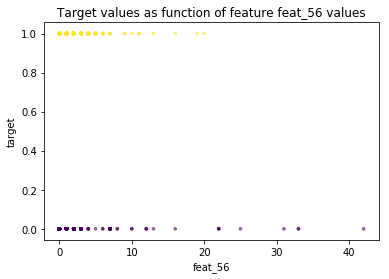

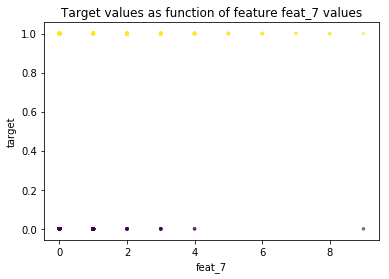

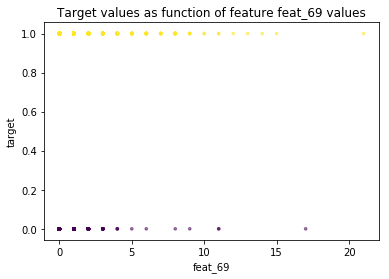

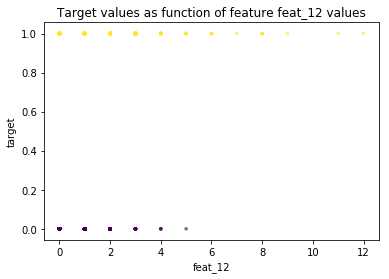

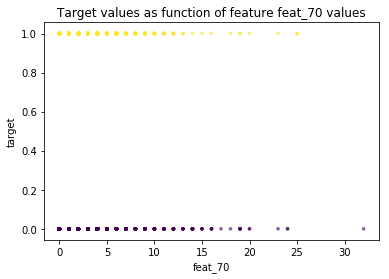

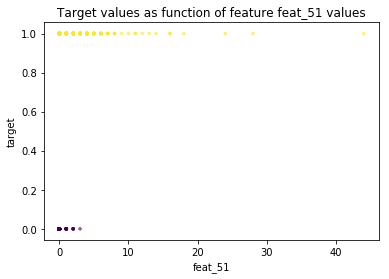

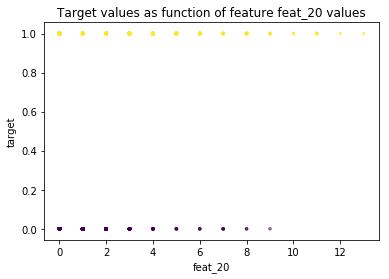

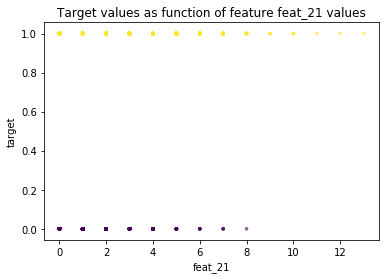

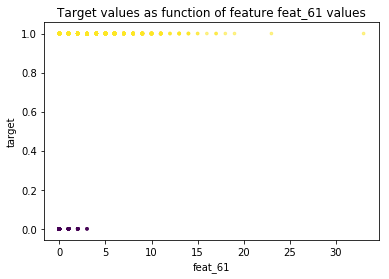

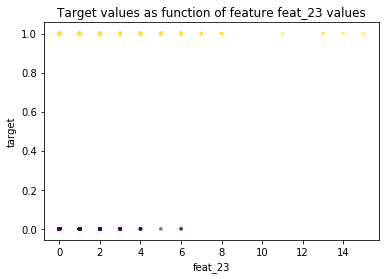

In [9]:
for feat in feat_columns_names:
    plt.scatter(df_train[feat],df_train["target"],s=7, c=df_train["target"], alpha=0.5,label="Class %s" %  df_train["target"],)
    plt.title("Target values as function of feature "+ feat + " values")
    plt.xlabel(feat)
    plt.ylabel("target")
    plt.show()

##### Creating histogram plot for each feature

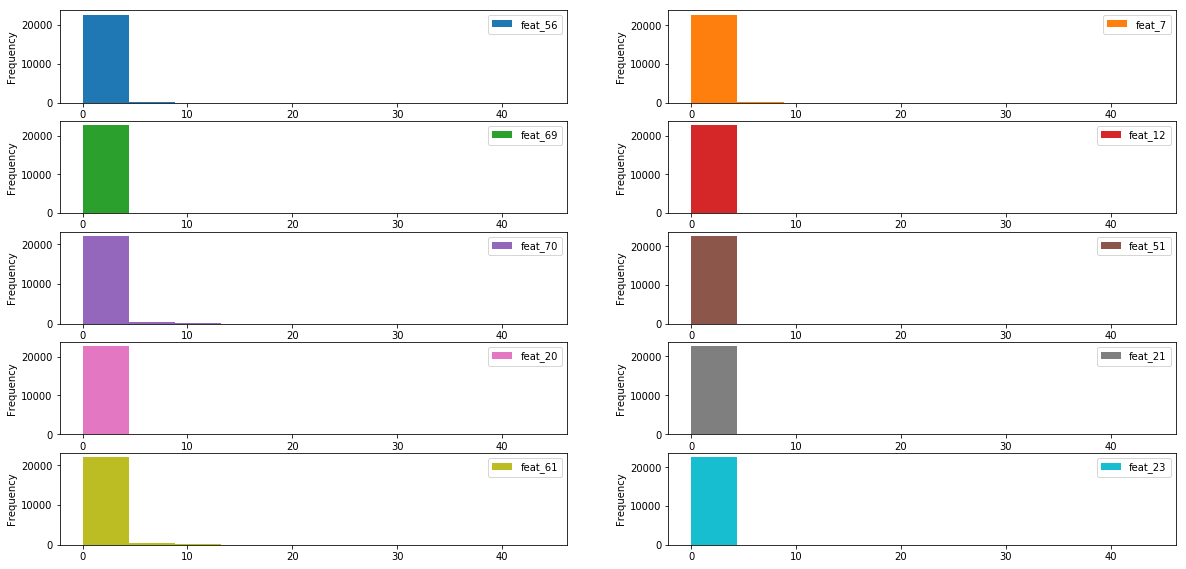

In [10]:
df_feat.plot(kind='hist', subplots=True, layout=(10,2), sharex=False,figsize=(20,20))
plt.show()

##### Creating Density plots

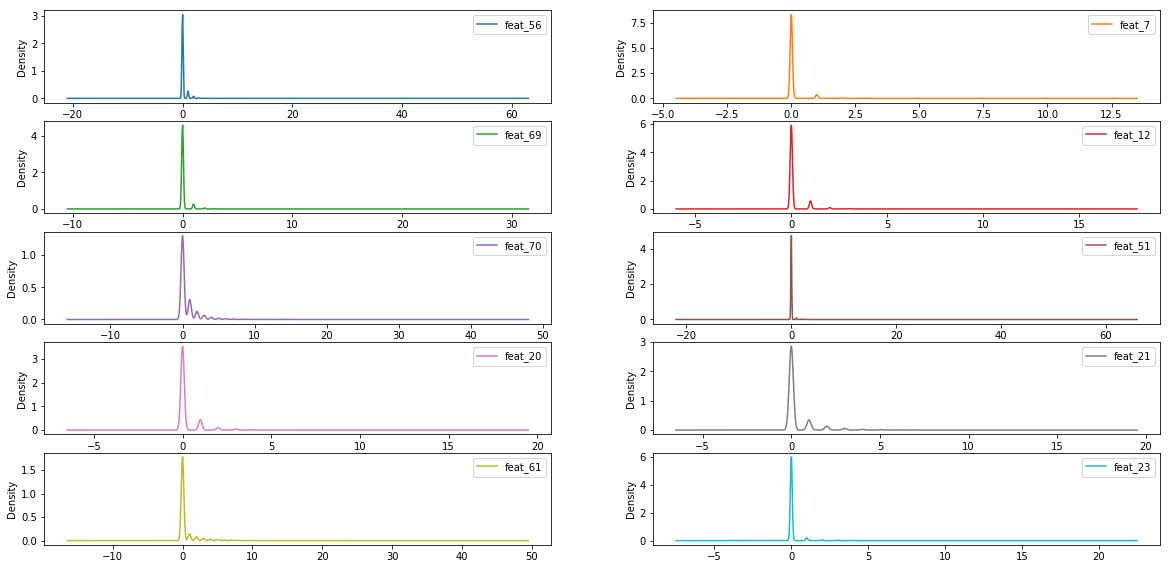

In [11]:
df_feat.plot(kind='density', subplots=True, layout=(10,2), sharex=False,figsize=(20,20))
plt.show()

##### Checking the relationship between all the features by the correlation matrix and covariance matrix

In [12]:
cov_df = df_feat.cov()
corr_df1 = df_feat.corr()
print "Covarianc:",cov_df
print "Correalation:",corr_df1

Covarianc:           feat_56    feat_7   feat_69   feat_12   feat_70   feat_51   feat_20  \
feat_56  0.723504  0.006405  0.006750  0.011668  0.091282  0.005148  0.017148   
feat_7   0.006405  0.113253  0.021448  0.004013  0.076504  0.008311  0.055279   
feat_69  0.006750  0.021448  0.353308  0.010617  0.065075  0.013922  0.094141   
feat_12  0.011668  0.004013  0.010617  0.199097  0.038344  0.004357  0.008541   
feat_70  0.091282  0.076504  0.065075  0.038344  2.442143  0.010727  0.296207   
feat_51  0.005148  0.008311  0.013922  0.004357  0.010727  0.343336  0.060678   
feat_20  0.017148  0.055279  0.094141  0.008541  0.296207  0.060678  0.511038   
feat_21  0.055801  0.008718 -0.001354  0.031250 -0.006167  0.006439 -0.013206   
feat_61  0.125985  0.032211  0.007905  0.058996 -0.097231  0.045849 -0.008027   
feat_23  0.009892  0.022304  0.037609  0.006289  0.059167  0.037798  0.067398   

          feat_21   feat_61   feat_23  
feat_56  0.055801  0.125985  0.009892  
feat_7   0.008718

##### Plotting the corelation between each features

In [13]:
scatter_matrix(df_train[feat_columns_names], alpha=0.2, figsize=(30, 30), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E4E2668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000015F86E48>]], dtype=object)

##### Plotting the correlation matrix

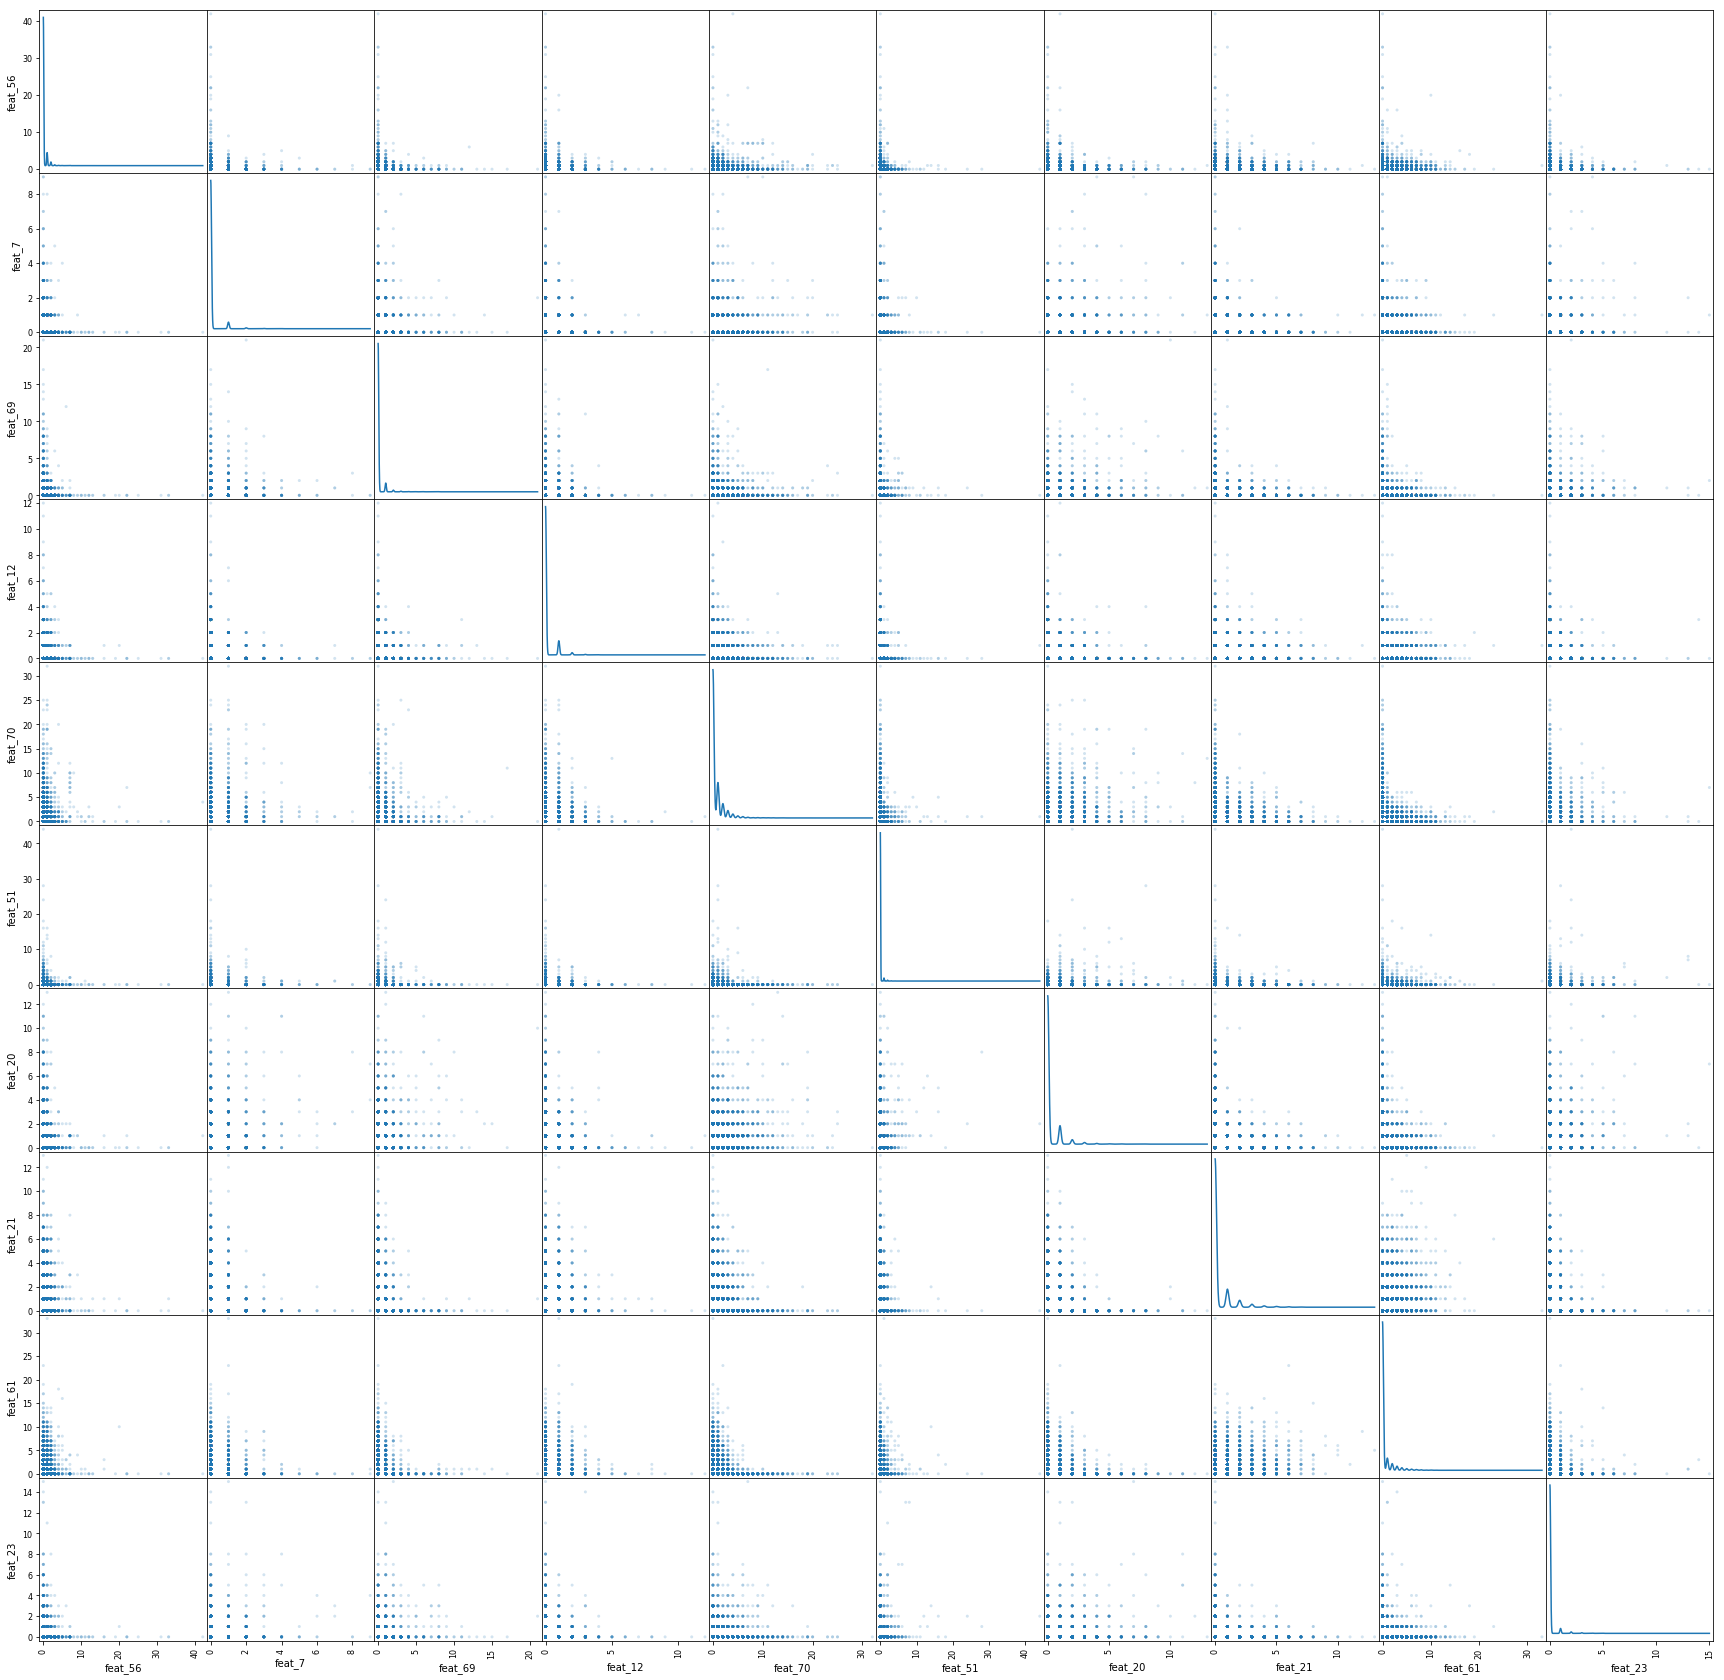

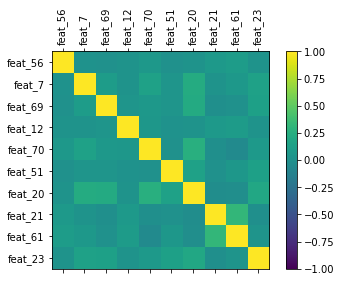

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr_df1, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,df_feat.shape[1],1) #need to change so could be adapted to more features
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(feat_columns_names,rotation=90)
ax.set_yticklabels(feat_columns_names)
plt.show()

# Preprocessing

###### Chek if the data is balanced

In [15]:
def check_if_classes_are_balancd(df):
    df_class_count_tot = df.groupby('target')['target'].count().reset_index(name="count")
    df_class_count_tot["percent from the total data"] =  df_class_count_tot["count"]/df.shape[0]
    num_classes =  df_class_count_tot.shape[0]
    df_class_count_tot["is balanced"]= (df_class_count_tot["percent from the total data"]<=(1/num_classes)+0.05) | (df_class_count_tot["percent from the total data"]>=(1/num_classes)-0.05)
    if df_class_count_tot["is balanced"].all()==True:
        return "data target is balanced"
    else: 
        return "data target is not balanced"

##### checking if there any missing data

In [16]:
print df_train.isnull().values.any()

False


##### removing outliers

In [17]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    
    ys.where(ys > upper_bound, upper_bound)
    ys.where(ys < lower_bound, lower_bound)
    return ys

In [18]:
# Removing outliers
df_feat_after_outliers = df_feat.copy()

for feat in feat_columns_names:
    df_feat_after_outliers[feat]=outliers_iqr(df_feat.loc[:,feat])

##### Data normalization

In [19]:
def normalizing_data(x_train, x_validation):
    scaler = Normalizer().fit(x_train)
    x_train = scaler.transform(x_train)
    x_validation = scaler.transform(x_validation)
    return x_train, x_validation

###### Probplot against normal distribution before Box-Cox transformation

In [20]:
def probplot_before_boxcox(x_train):
    for feat in range(x_train.shape[1]):
        fig = plt.figure(figsize=(6, 6))
        ax2 = fig.add_subplot(212)
        prob = stats.probplot(x_train[:,feat], dist=stats.norm, plot=ax2)
        ax2.set_title('Probplot Before Box-Cox transformation')
        plt.show()

# Feature Selection and Engineering

### Feature Creation

###### GMM

In [21]:
def feature_creation_gmm(x_train,x_validation):

    gmm = mixture.GaussianMixture(n_components=2)
    gmm.fit(x_train)

    # Create a new feature Of posterior probability of data under one Gaussian
    new_feat_train = gmm.predict_proba(x_train)[:,0]
    new_feat_validation = gmm.predict_proba(x_validation)[:,0]
    return new_feat_train, new_feat_validation

###### PolynomialFeatures

In [22]:
def feature_polonomial(x_train,x_validation):
    #Generating polynomial and interaction features by polynom of 2.
    poly = PolynomialFeatures(2)
    poly.fit(x_train) 
    x_train = poly.transform(x_train) 
    x_validation  = poly.transform(x_validation) 
    return x_train,x_validation

#### Add the feature from gmm to the polonomial features

In [23]:
def append_all_features(x_train,x_validation,new_feat_train, new_feat_validation):    
    train = np.append(x_train, np.transpose([new_feat_train]) , axis=1)
    valid = np.append(x_validation, np.transpose([new_feat_validation]) ,axis=1)
    return train,valid

### Feature Selection

##### PCA - Principal Component Analysis

In [24]:
def pca_show_explained_variance_ratio(x_train):
    num_features = x_train.shape[1]
    pca = PCA(n_components=num_features)
    pca.fit(x_train)
    reduced_data = pca.transform(x_train)
    explained_variance_ratio = pca.explained_variance_ratio_
    plt.plot(explained_variance_ratio.cumsum())
    plt.xlabel('Number of features')
    plt.ylabel('Cumulative variance ratio')
    plt.title("Cumulative variance ratio by the number of features")
    plt.show()
    print "The Explained variance ratio are:",np.round(explained_variance_ratio, 2)

In [25]:
def find_number_of_components(pca, wanted_ratio):
    return np.sum(pca.explained_variance_ratio_.cumsum()< wanted_ratio) +1

#### BoxCox transformation

In [26]:
def proplot_after_boxCox_transformation(df_new_feat_train,df_new_feat_validation):
    scaler = preprocessing.Normalizer().fit(df_new_feat_train)
    df_new_feat_train = scaler.transform(df_new_feat_train)
    df_new_feat_validation = scaler.transform(df_new_feat_validation)

    # Shift the values by 1 to get rid of zeros
    df_new_feat_train_model_gaussian_regression = df_new_feat_train+1
    df_new_feat_validation_model_gaussian_regression = df_new_feat_validation+1

    for feat in feat_columns_names:

        box_train = boxcox(df_new_feat_train_model_gaussian_regression[feat])[0]
        box_validation = boxcox(df_new_feat_validation_model_gaussian_regression[feat])[0]
        scaler2 = preprocessing.StandardScaler().fit(box_train.reshape(-1, 1))
        df_new_feat_train = scaler2.transform(df_new_feat_train_model_gaussian_regression)
        df_new_feat_validation = scaler2.transform(df_new_feat_validation_model_gaussian_regression)
        
        fig = plt.figure()
        ax2 = fig.add_subplot(212)
        prob = stats.probplot(df_new_feat_train_model_gaussian_regression[feat], dist=stats.norm, plot=ax2)
        ax2.set_title('Probplot after Box-Cox transformation')
        plt.show()
    return df_new_feat_train_model_gaussian_regression, df_new_feat_validation_model_gaussian_regression

# Models

### Gaussian

In [27]:
def gaussian_model(x_train_gaussian_regression, y_train,x_validation_gaussian_regression, y_validation):    

    gnb = GaussianNB(priors = None)
    gnb.fit(x_train_gaussian_regression, y_train)
    y_predicted = gnb.predict(x_validation_gaussian_regression)
    cm = confusion_matrix(y_validation, y_predicted)
    # evaluate accuracy
    print "----------------------Gaussian Model---------------------------------"
    print "Score for training set:", gnb.score(x_train_gaussian_regression, y_train)
    print "Score for validation set:", gnb.score(x_validation_gaussian_regression, y_validation)
    print "Confusion Matrix:", 
    
    # Get results for auc calculations
    y_prob_train = gnb.predict_proba(x_train_gaussian_regression)[:,1]
    y_prob_val = gnb.predict_proba(x_validation_gaussian_regression)[:,1]
    fpr1, tpr1, thresholds1 = roc_curve(y_train, y_prob_train)
    fpr2, tpr2, thresholds2 = roc_curve(y_validation, y_prob_val)

    return (fpr1, tpr1,fpr2, tpr2, cm)

### Logistic Regression

In [28]:
def logistic_regression_model(x_train_gaussian_regression, y_train,x_validation_gaussian_regression, y_validation):    
    lr = LogisticRegression(penalty="l2",
                             dual=False, 
                             tol=1e-18, 
                             C=1, 
                             fit_intercept=True, 
                             intercept_scaling=1, 
                             class_weight=None, 
                             random_state=None, 
                             solver="liblinear", 
                             max_iter=100, 
                             multi_class="ovr", 
                             verbose=0, 
                             warm_start=False, 
                             n_jobs=1)

    lr.fit(x_train_gaussian_regression, y_train)
    y_predicted = lr.predict(x_validation_gaussian_regression)
    cm = confusion_matrix(y_validation, y_predicted)
    
    # evaluate accuracy
    print "----------------------Logistic Regression---------------------------------"
    print "Score for training set:", lr.score(x_train_gaussian_regression, y_train)
    print "Score for validation set:", lr.score(x_validation_gaussian_regression, y_validation)
    print "Confusion Matrix:", cm
    
    # Get results for auc calculations
    y_prob_train = lr.predict_proba(x_train_gaussian_regression)[:,1]
    y_prob_val = lr.predict_proba(x_validation_gaussian_regression)[:,1]
    fpr1, tpr1, thresholds1 = roc_curve(y_train, y_prob_train)
    fpr2, tpr2, thresholds2 = roc_curve(y_validation, y_prob_val)
    
    return (fpr1, tpr1,fpr2, tpr2, cm)

### KNN

###### Choose the metric distance and k

#### Choose K by elbow method

In [29]:
def elbow_method(df_new_feat_train):    
    K = range(1, 10)
    meandistortions = []
    for k in K:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df_new_feat_train)
        meandistortions.append(sum(np.min(cdist(df_new_feat_train, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df_new_feat_train.shape[0])
    
    #plot the distances
    plt.plot(K, meandistortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Average distortion')
    plt.title('Selecting k with the Elbow Method')

    acceleration = np.diff(meandistortions, 2)  # 2nd derivative of the distances
    acceleration_rev = acceleration[::-1]
    
    #plot the  derivative of the distances
    plt.plot(K[1:-1], acceleration)
    plt.show()
    
    optimal_k = acceleration_rev.argmax()+2
    print "Elbow Method - num of clusters:", optimal_k
    return optimal_k

#### choosing k by num_observations^(1/(num_features-1))

In [30]:
def choosing_k_by_function(df_new_feat_train):
    num_observations = df_new_feat_train.shape[0]
    num_features = df_new_feat_train.shape[1]
    k = math.pow(num_observations, (1/float(num_features-1)))
    k=int(k)
    if k%2==0:
        k=k+1
    print "Choosing by function - num of clusters:", k
    return k

#### choosing k by Cross-validation

In [31]:
def cross_validation_k(x_train, y_train):
    from sklearn.model_selection import cross_val_score
    
    # creating odd list of K for KNN
    myList = list(range(1,50))

    # subsetting just the odd ones
    k_neighbors = filter(lambda x: x % 2 != 0, myList)

    # empty list that will hold misclassification error
    MSE = []

    # perform 5-fold cross validation
    for k in k_neighbors:
        knn = neighbors.KNeighborsClassifier(n_neighbors=k, weights="distance", metric="euclidean", algorithm= "brute")
        scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='roc_auc')
        MSE.append(1-scores.mean())

    # determining best k
    optimal_k = k_neighbors[MSE.index(min(MSE))]

    # plot misclassification error vs k
    plt.plot(k_neighbors, MSE)
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Misclassification Error')
    plt.show()
    print "Choosing cross validation - num of clusters:", optimal_k
    return optimal_k

##### Use the classifier K-Nearest Neighbour

In [32]:
def knc_model(df_new_feat_train, y_train,df_new_feat_validation, y_validation,optimal_k):
    knc = neighbors.KNeighborsClassifier(n_neighbors=optimal_k,weights="distance",metric="euclidean",algorithm= "brute")
    knc.fit(df_new_feat_train, y_train)
    y_predicted = knc.predict(df_new_feat_validation)
    cm = confusion_matrix(y_validation, y_predicted) 
    
    # evaluate accuracy
    print "----------------------KNN---------------------------------"
    print "Score for training set:", knc.score(df_new_feat_train, y_train)
    print "Score for validation set:", knc.score(df_new_feat_validation, y_validation)
    print "Confusion Matrix:", cm
    
    # Get results for auc calculations
    y_prob_train = knc.predict_proba(df_new_feat_train)[:,1]
    y_prob_val = knc.predict_proba(df_new_feat_validation)[:,1]
    fpr1, tpr1, thresholds1 = roc_curve(y_train, y_prob_train)
    fpr2, tpr2, thresholds2 = roc_curve(y_validation, y_prob_val)
    
    return (fpr1, tpr1,fpr2, tpr2, cm)

### Neural Networks

In [33]:
def neural_network_model(x_train,y_train,x_validation,y_validation, h_l_s): 
    fig, ax = plt.subplots()
    
    # different learning rate schedules and momentum parameters
    params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
               'learning_rate_init': 0.2,'activation':"relu"},
              {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
               'nesterovs_momentum': False, 'learning_rate_init': 0.2,'activation':"relu"},
              {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
               'nesterovs_momentum': True, 'learning_rate_init': 0.2,'activation':"relu"},
              {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
               'learning_rate_init': 0.2,'activation': "relu"},
              {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
               'nesterovs_momentum': True, 'learning_rate_init': 0.2,'activation':"relu"},
              {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
               'nesterovs_momentum': False, 'learning_rate_init': 0.2,'activation':"relu"},
              {'solver': 'adam', 'learning_rate_init': 0.01,'activation':"relu"},
              {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
               'learning_rate_init': 0.2,'activation':"logistic"},
              {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
               'nesterovs_momentum': False, 'learning_rate_init': 0.2,'activation':"logistic"},
              {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
               'nesterovs_momentum': True, 'learning_rate_init': 0.2,'activation':"logistic"},
              {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
               'learning_rate_init': 0.2,'activation':"logistic"},
              {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
               'nesterovs_momentum': True, 'learning_rate_init': 0.2,'activation':"logistic"},
              {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
               'nesterovs_momentum': False, 'learning_rate_init': 0.2,'activation':"logistic"},
              {'solver': 'adam', 'learning_rate_init': 0.01,'activation':"logistic"}
             ]
    # Labels for the graph
    labels = ["constant learning-rate-relu", "constant with momentum-relu",
              "constant with Nesterov's momentum-relu",
              "inv-scaling learning-rate-relu", "inv-scaling with momentum-relu",
              "inv-scaling with Nesterov's momentum-relu", "adam-relu",

              "constant learning-rate-logistic", "constant with momentum-logistic",
              "constant with Nesterov's momentum-logistic",
              "inv-scaling learning-rate-logistic", "inv-scaling with momentum-logistic",
              "inv-scaling with Nesterov's momentum-logistic", "adam-logistic"
             ]
    # Parameters for the graph
    plot_args = [{'c': 'red', 'linestyle': '-'},
                 {'c': 'green', 'linestyle': '-'},
                 {'c': 'blue', 'linestyle': '-'},
                 {'c': 'red', 'linestyle': '--'},
                 {'c': 'green', 'linestyle': '--'},
                 {'c': 'blue', 'linestyle': '--'},
                 {'c': 'black', 'linestyle': '-'},
                 {'c': 'aqua', 'linestyle': '-'},
                 {'c': 'k', 'linestyle': '-'},
                 {'c': 'teal', 'linestyle': '-'},
                 {'c': 'indigo', 'linestyle': '--'},
                 {'c': 'k', 'linestyle': '--'},
                 {'c': 'peru', 'linestyle': '--'},
                 {'c': 'm', 'linestyle': '-'}
                ]
    
    # plot learning for each learning strategy
    print("\n----------------------Neural Network-learning on dataset----------------------")
    ax.set_title("The loss curve for each option")
    mlps = []
    for label, param in zip(labels, params):
        print("-----------------------------------")
        print("Training: %s" % label)
        mlp = MLPClassifier(verbose=0, random_state=0,
                            #-----The architecture:------#
                            #activation="logistic",
                            hidden_layer_sizes= h_l_s,
                            alpha = 0.0001, #The regularization: loss + alpha*W^2
                            batch_size = "auto",
                            #-----The optimizer:------#
                            max_iter = 400,power_t = 0.5,
                            early_stopping = False, tol = 1e-4,
                            warm_start = False, **param)
        mlp.fit(x_train, y_train)
        mlps.append(mlp)
        
        # evaluate accuracy
        print("Training set score: %f" % mlp.score(x_train, y_train))
        print("Training set loss: %f" % mlp.loss_)
    
    max_auc = -float("inf")
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)
        
        # Get results for auc calculations
        y_prob_val = mlp.predict_proba(df_new_feat_validation)[:,1]
        fpr2, tpr2, thresholds2 = roc_curve(y_validation, y_prob_val)
        auc_validation = metrics.auc(fpr2, tpr2)
        # find the model wit best auc
        if auc_validation > max_auc:
            best_mlp_model = mlp
            max_auc = auc_validation
            l = label
    
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    #Labels for the plot
    ax.set_xlabel('Number of steps')
    ax.set_ylabel('Loss')
    plt.show()
    
    # Results
    print "The Best model is:"+ l
    y_predicted = best_mlp_model.predict(df_new_feat_validation)
    cm = confusion_matrix(y_validation, y_predicted)
    y_prob_train = best_mlp_model.predict_proba(df_new_feat_train)[:,1]
    y_prob_val = best_mlp_model.predict_proba(df_new_feat_validation)[:,1]
    fpr1, tpr1, thresholds1 = roc_curve(y_train, y_prob_train)
    fpr2, tpr2, thresholds2 = roc_curve(y_validation, y_prob_val)
    print "Confusion Matrix:",cm 
    
    return (fpr1, tpr1,fpr2, tpr2, cm)

## Decision Trees

In [34]:
def decision_tree_max_leaf(df_new_feat_train, y_train, df_new_feat_validation, y_validation):   
    from sklearn import metrics
    train_scores, test_scores = [],[]
    # change the max_leaf_nodes and see the scores of the train and the test
    max_auc = -float("inf")
    for k in range(2,100):
        dtc = DecisionTreeClassifier(criterion='gini', 
                                     splitter='best', 
                                     max_depth=900,  
                                     min_samples_split=2, 
                                     min_samples_leaf=2, 
                                     max_features=None, 
                                     max_leaf_nodes=k, 
                                     min_impurity_split=1e-7, 
                                     random_state=42)
        dtc.fit(df_new_feat_train,y_train)
        
        # Get results for auc calculations
        y_prob_train = dtc.predict_proba(df_new_feat_train)[:,1]
        y_prob_validation = dtc.predict_proba(df_new_feat_validation)[:,1]
        fpr1, tpr1, thresholds1 = roc_curve(y_train, y_prob_train)
        fpr2, tpr2, thresholds2 = roc_curve(y_validation, y_prob_validation)
        
        # Calculate the total value as average of the result of train and validation
        auc_train = metrics.auc(fpr1, tpr1) 
        auc_validation = metrics.auc(fpr2, tpr2)
        
        #Add the auc to lists
        train_scores.append(auc_train)
        test_scores.append(metrics.auc(fpr2, tpr2))
        
        #Finf the best model with the best total value
        if auc_validation>max_auc:
            max_leaf_nodes = k
            max_auc = auc_validation

    # Plot the train and validation
    plt.plot(range(2,100), train_scores)
    plt.plot(range(2,100), test_scores)
    plt.ylabel('AUC')
    plt.xlabel('Max Leaf Nodes')
    plt.show()
    print "The max_leaf_nodes is:",max_leaf_nodes
    
    return max_leaf_nodes

##### Ensemble Learners

In [38]:
def decision_tree_model(df_new_feat_train, y_train, df_new_feat_validation, y_validation, m_s_s):    
    from sklearn import metrics
    # different criterion and splitter
    params = [{'criterion':'gini','splitter':'best'},
            {'criterion':'gini','splitter':'random'}, 
            {'criterion':'entropy','splitter':'best'}, 
            {'criterion':'entropy','splitter':'random'}
             ]
    #min_auc = float("inf")
    max_auc = -float("inf")
    for param in params:
        print("-------------------------------------------------------------------------------")
        print "The parameters:"
        print param
        print("-------------------------------------------------------------------------------")
        dtc = DecisionTreeClassifier(
                                 max_depth=900,  
                                 min_samples_split=2, 
                                 min_samples_leaf=2, 
                                 max_features=None, 
                                 max_leaf_nodes=m_s_s, 
                                 min_impurity_split=1e-7, 
                                 random_state=42, **param)
        dtc.fit(df_new_feat_train,y_train)
        
        # evaluate accuracy
        print("\n----------------------Decision Tree------------------------------------")
        print("Training set score: %f" % dtc.score(df_new_feat_train,y_train))
        print("Validation set score: %f" % dtc.score(df_new_feat_validation, y_validation))
        
        # Get results for auc calculations
        y_prob_train = dtc.predict_proba(df_new_feat_train)[:,1]
        y_prob_validation = dtc.predict_proba(df_new_feat_validation)[:,1]
        fpr1, tpr1, thresholds1 = roc_curve(y_train, y_prob_train)
        fpr2, tpr2, thresholds2 = roc_curve(y_validation, y_prob_validation)
        
        auc_val = metrics.auc(fpr2, tpr2)
        
        #Get the best model
        if auc_val>max_auc:
            max_auc = auc_val
            best_model = dtc
    
    # Get results for auc calculations of best model
    y_prob_train = best_model.predict_proba(df_new_feat_train)[:,1]
    y_prob_val = best_model.predict_proba(df_new_feat_validation)[:,1]
    fpr1, tpr1, thresholds1 = roc_curve(y_train, y_prob_train)
    fpr2, tpr2, thresholds2 = roc_curve(y_validation, y_prob_val)
    
    y_predicted = best_model.predict(df_new_feat_validation)
    cm = confusion_matrix(y_validation, y_predicted)
    print "Confusion Matrix:", cm
    
    print "The chosen model is:"
    print dtc
    
    return (fpr1, tpr1,fpr2, tpr2, cm)

In [39]:
def ensemble_learners_model(df_new_feat_train, y_train, df_new_feat_validation, y_validation):
    from sklearn import metrics
    abc = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=1), 
                             n_estimators=100,
                             algorithm = "SAMME") 

    abc.fit(df_new_feat_train, y_train) 
    y_predicted = abc.predict(df_new_feat_validation)
    cm = confusion_matrix(y_validation, y_predicted)
    
    print "----------------------Ensemble Learners Model---------------------------------"
    print "Score for training set:", abc.score(df_new_feat_train, y_train)
    print "Score for validation set:", abc.score(df_new_feat_validation, y_validation)
    print "Confusion Matrix:", cm
    
    weights = abc.estimator_weights_ #<---- the weights of each DT classifier
    
    # Plot the weights of each estimator
    plt.plot(weights/np.sum(weights))
    plt.ylabel('Weight')
    plt.xlabel('Number of estimator')
    plt.title("The weights of each estimator")
    plt.show()
    
    # Get results for auc calculations
    y_prob_train = abc.predict_proba(df_new_feat_train)[:,1]
    y_prob_val = abc.predict_proba(df_new_feat_validation)[:,1]
    fpr1, tpr1, thresholds1 = roc_curve(y_train, y_prob_train)
    fpr2, tpr2, thresholds2 = roc_curve(y_validation, y_prob_val)
                 
    return (fpr1, tpr1,fpr2, tpr2, cm)

In [40]:
class mean_rpc_curve:
    def __init__(self,label,color):
        self.label = label
        self.color = color
        self.mean_tpr = 0.0
        self.mean_fpr = np.linspace(0, 1, 100)
        self.all_tpr = []
        self.list_confusion_matix = np.zeros((2,2))
    
    def update_values(self, fpr, tpr):
        self.mean_tpr += interp(self.mean_fpr, fpr, tpr)
        self.mean_tpr[0] = 0.0

#### Spliting to train and validation

---------------------Fold number: 1 ------------------------------
All data observations: data target is balanced
Train: data target is balanced
Validation: data target is balanced


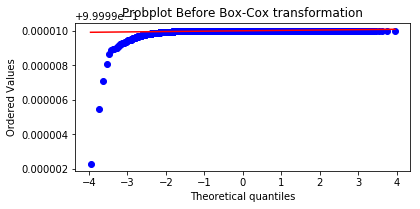

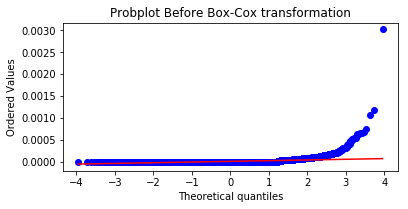

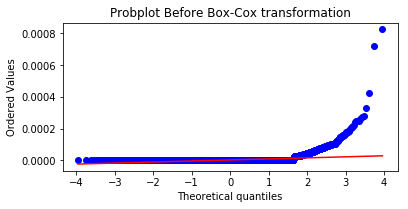

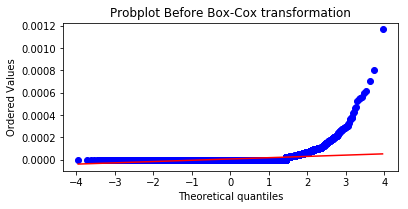

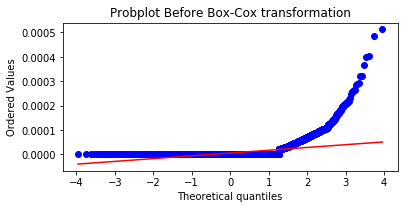

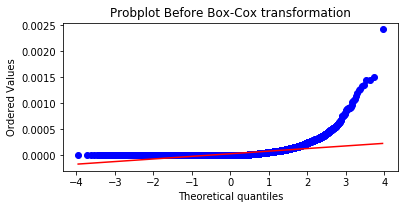

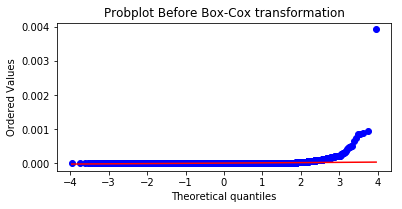

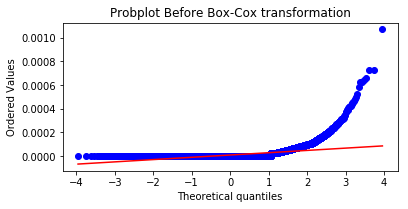

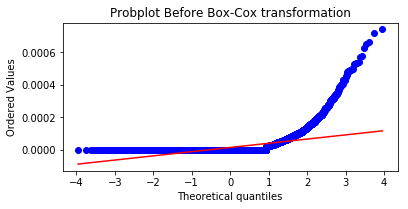

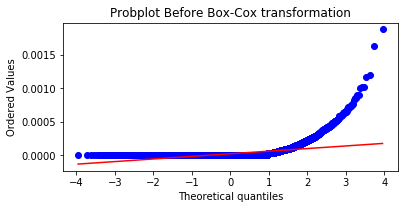

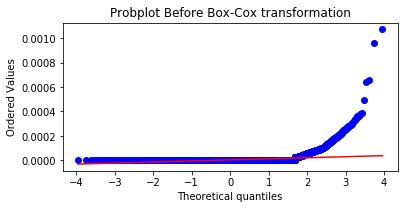

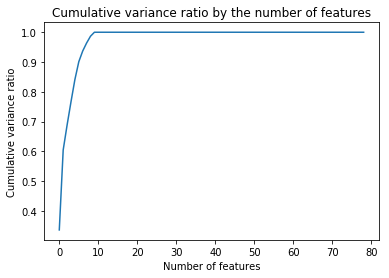

The Explained variance ratio are: [ 0.34  0.27  0.08  0.08  0.07  0.06  0.04  0.03  0.02  0.01  0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.  ]


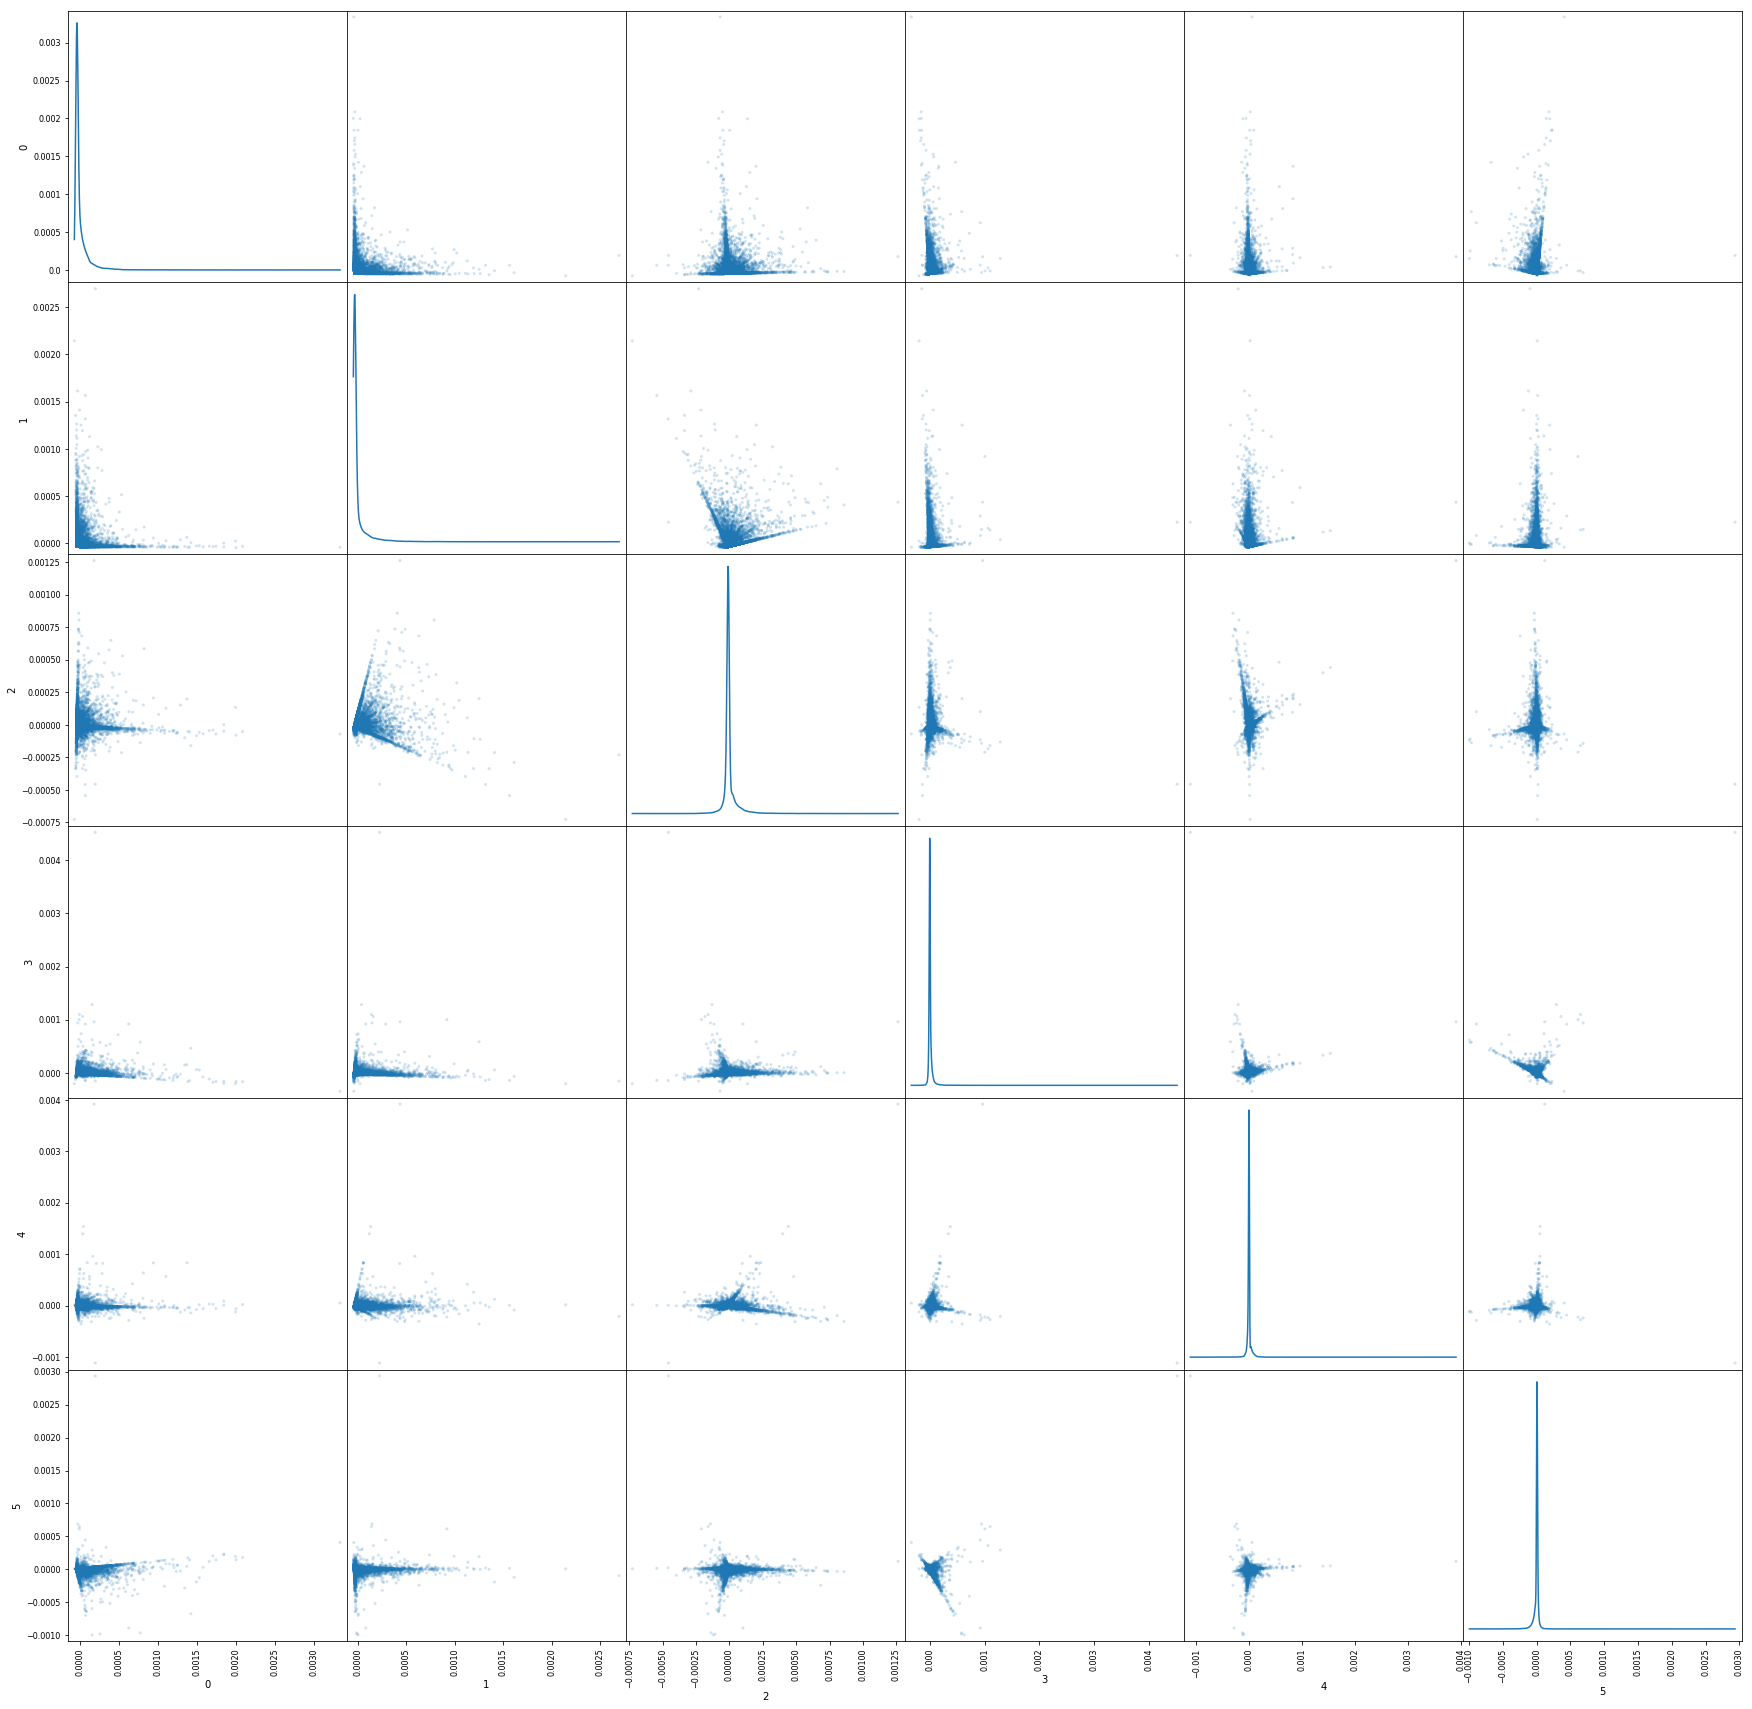

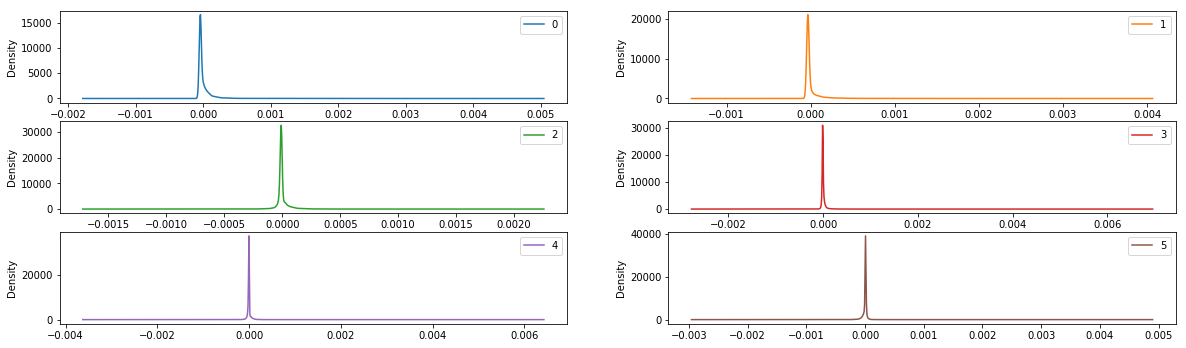

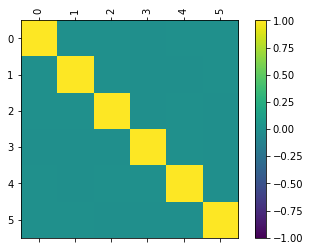

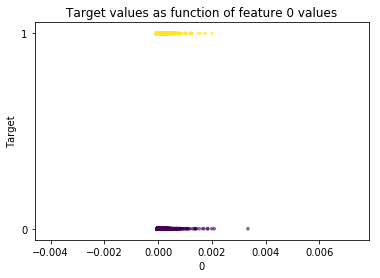

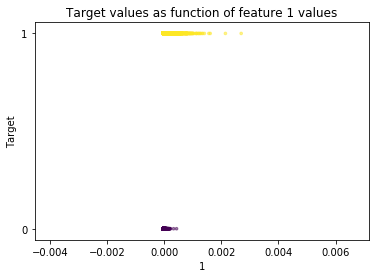

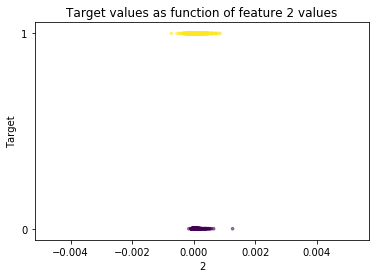

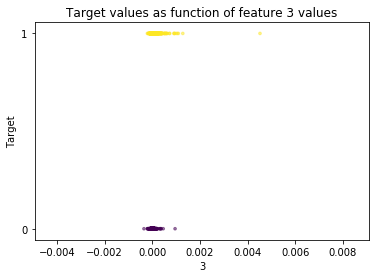

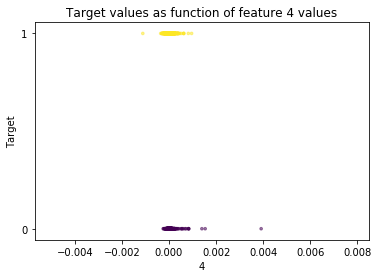

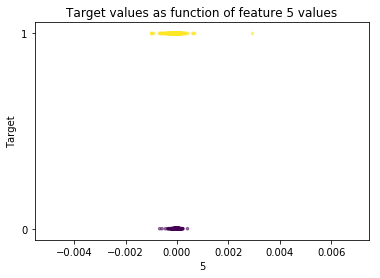

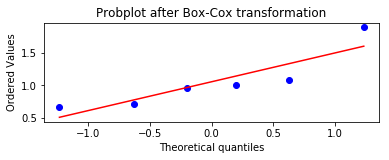

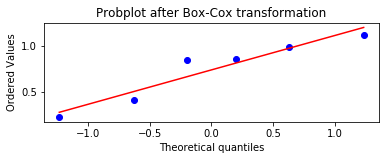

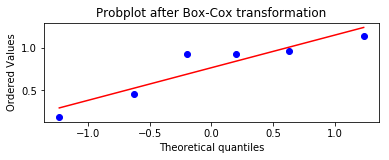

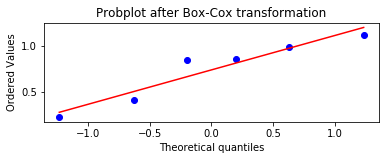

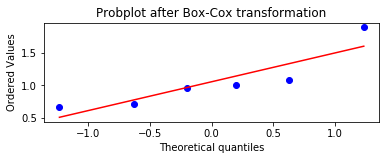

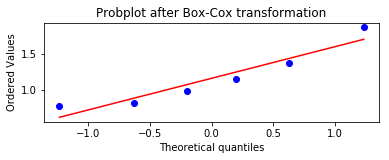

----------------------Gaussian Model---------------------------------
Score for training set: 0.717689133425
Score for validation set: 0.708846830986
Confusion Matrix: ----------------------Logistic Regression---------------------------------
Score for training set: 0.733920220083
Score for validation set: 0.682218309859
Confusion Matrix: [[1543  819]
 [ 625 1557]]


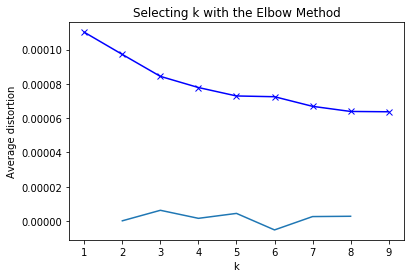

Elbow Method - num of clusters: 7


C:\Users\or\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


----------------------KNN---------------------------------
Score for training set: 0.896396148556
Score for validation set: 0.70048415493
Confusion Matrix: [[1905  457]
 [ 904 1278]]
Choosing by function - num of clusters: 7
----------------------KNN---------------------------------
Score for training set: 0.896396148556
Score for validation set: 0.70048415493
Confusion Matrix: [[1905  457]
 [ 904 1278]]


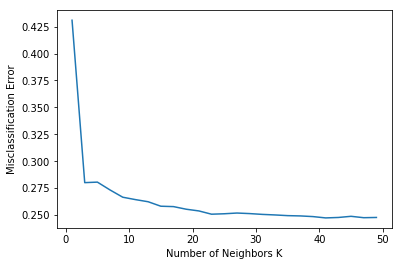

Choosing cross validation - num of clusters: 41
----------------------KNN---------------------------------
Score for training set: 0.896396148556
Score for validation set: 0.712588028169
Confusion Matrix: [[1910  452]
 [ 854 1328]]

----------------------Neural Network-learning on dataset----------------------
-----------------------------------
Training: constant learning-rate-relu
Training set score: 0.533535
Training set loss: 0.691251
-----------------------------------
Training: constant with momentum-relu
Training set score: 0.533535
Training set loss: 0.691472
-----------------------------------
Training: constant with Nesterov's momentum-relu
Training set score: 0.533535
Training set loss: 0.691707
-----------------------------------
Training: inv-scaling learning-rate-relu
Training set score: 0.533535
Training set loss: 0.691024
-----------------------------------
Training: inv-scaling with momentum-relu
Training set score: 0.533535
Training set loss: 0.691023
----------------

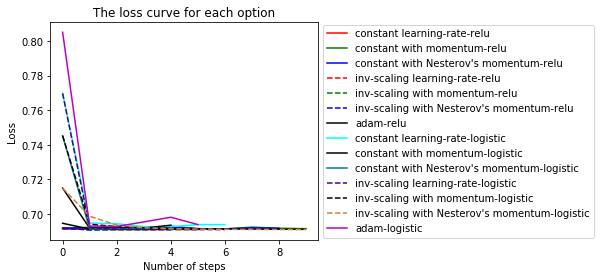

The Best model is:adam-relu
Confusion Matrix: [[2362    0]
 [2182    0]]

----------------------Neural Network-learning on dataset----------------------
-----------------------------------
Training: constant learning-rate-relu
Training set score: 0.533535
Training set loss: 0.691061
-----------------------------------
Training: constant with momentum-relu
Training set score: 0.533535
Training set loss: 0.691262
-----------------------------------
Training: constant with Nesterov's momentum-relu
Training set score: 0.533535
Training set loss: 0.691272
-----------------------------------
Training: inv-scaling learning-rate-relu
Training set score: 0.533535
Training set loss: 0.690982
-----------------------------------
Training: inv-scaling with momentum-relu
Training set score: 0.533535
Training set loss: 0.691025
-----------------------------------
Training: inv-scaling with Nesterov's momentum-relu
Training set score: 0.533535
Training set loss: 0.691091
------------------------------

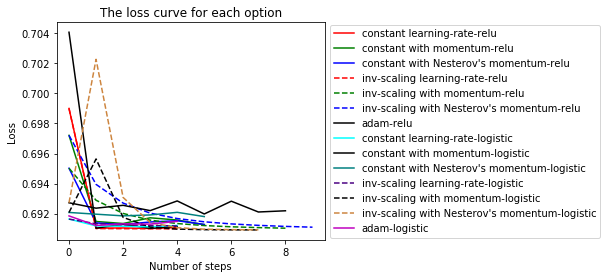

The Best model is:adam-relu
Confusion Matrix: [[2362    0]
 [2166   16]]


C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packa

C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packa

C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packa

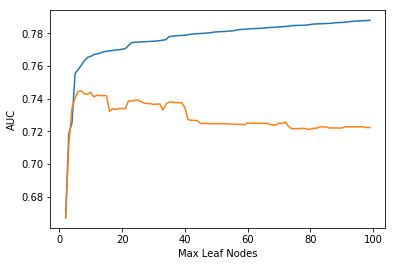

The max_leaf_nodes is: 7
-------------------------------------------------------------------------------
The parameters:
{'splitter': 'best', 'criterion': 'gini'}
-------------------------------------------------------------------------------

----------------------Decision Tree------------------------------------
Training set score: 0.728748
Validation set score: 0.716769
-------------------------------------------------------------------------------
The parameters:
{'splitter': 'random', 'criterion': 'gini'}
-------------------------------------------------------------------------------

----------------------Decision Tree------------------------------------
Training set score: 0.685502
Validation set score: 0.694542
-------------------------------------------------------------------------------
The parameters:
{'splitter': 'best', 'criterion': 'entropy'}
-------------------------------------------------------------------------------

----------------------Decision Tree--------------

C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


----------------------Ensemble Learners Model---------------------------------
Score for training set: 0.731334250344
Score for validation set: 0.711487676056
Confusion Matrix: [[1794  568]
 [ 743 1439]]


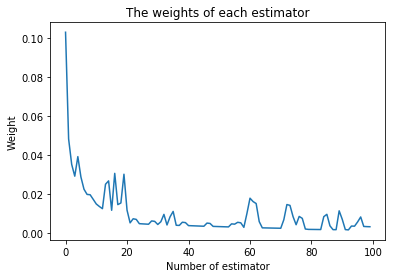

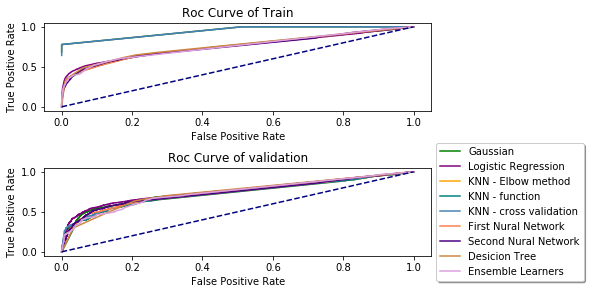

---------------------Fold number: 2 ------------------------------
All data observations: data target is balanced
Train: data target is balanced
Validation: data target is balanced


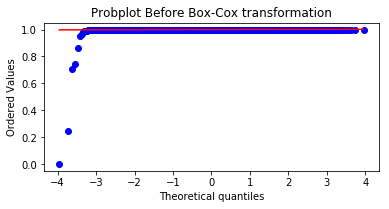

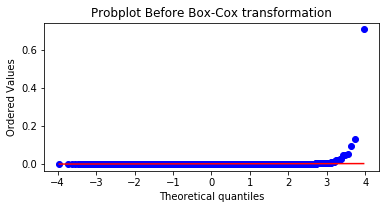

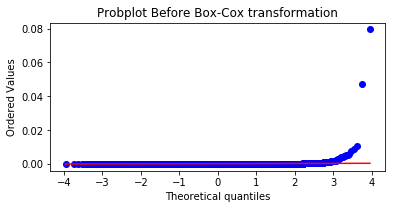

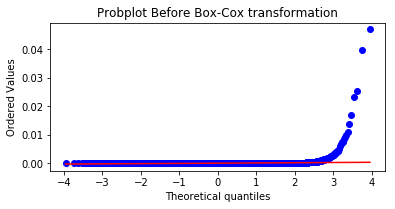

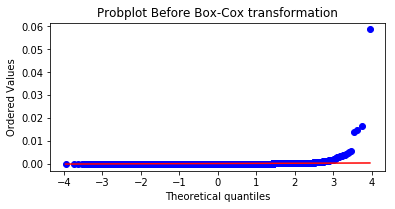

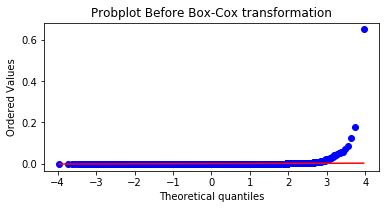

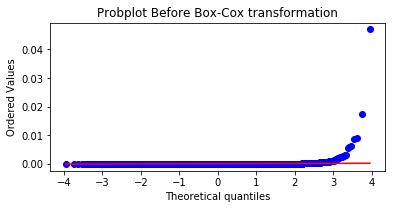

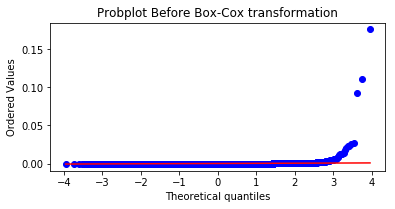

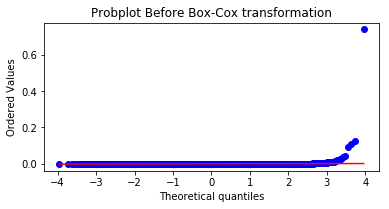

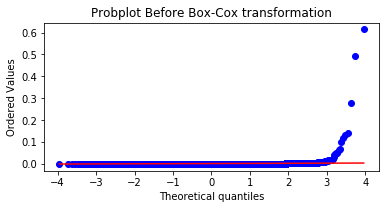

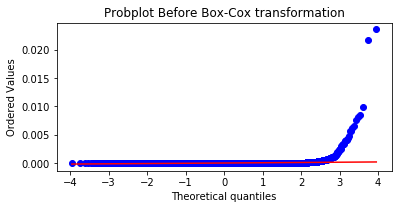

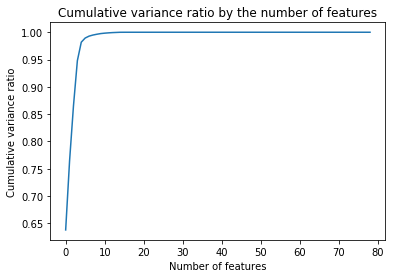

The Explained variance ratio are: [ 0.64  0.13  0.1   0.08  0.03  0.01  0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.  ]


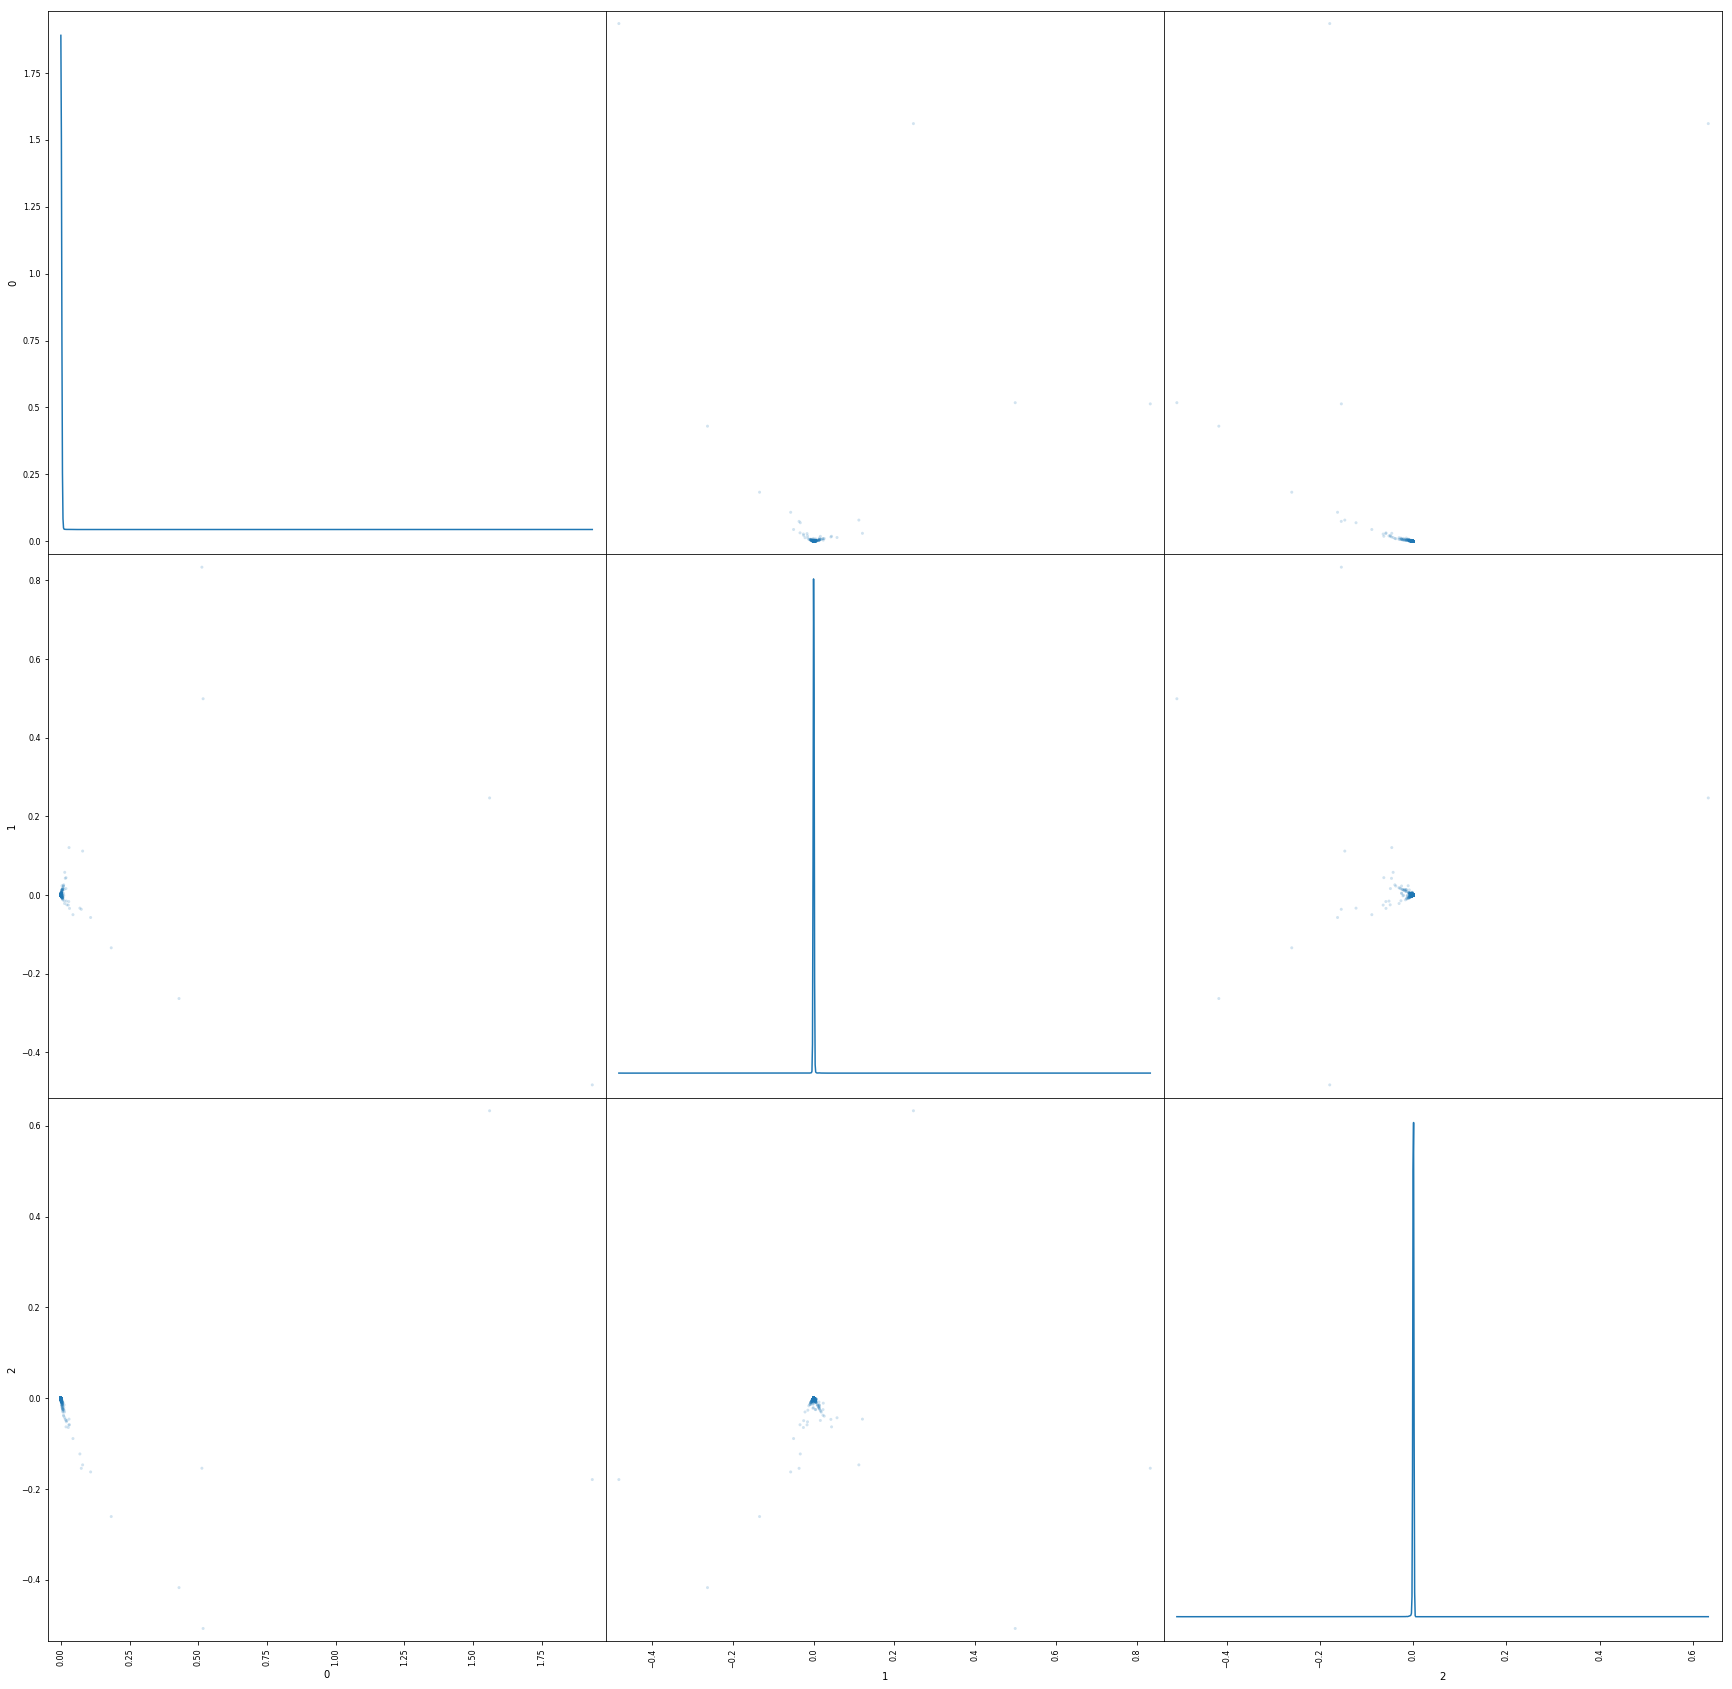

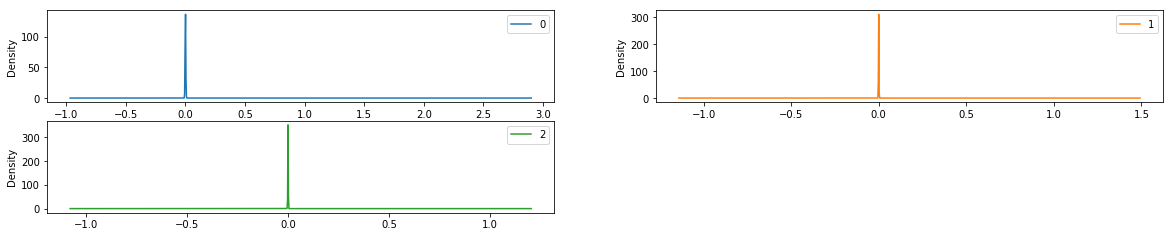

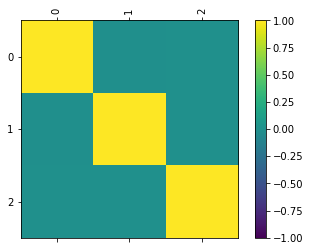

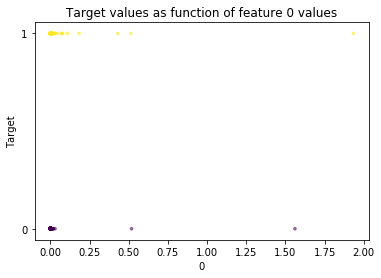

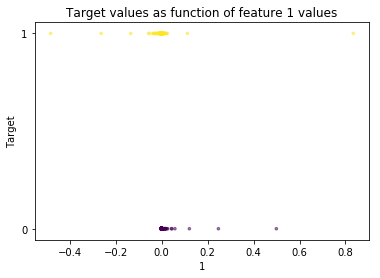

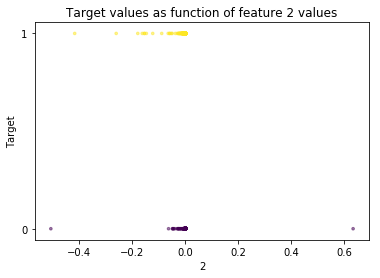

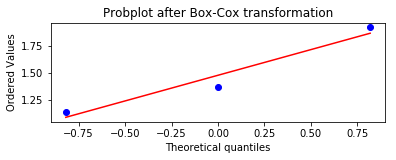

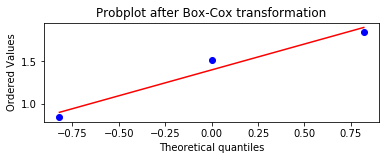

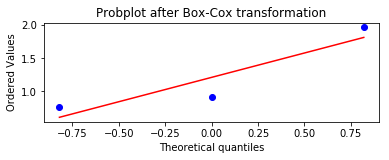

----------------------Gaussian Model---------------------------------
Score for training set: 0.575735900963
Score for validation set: 0.614876760563
Confusion Matrix: ----------------------Logistic Regression---------------------------------
Score for training set: 0.642640990371
Score for validation set: 0.671434859155
Confusion Matrix: [[2194  250]
 [1243  857]]


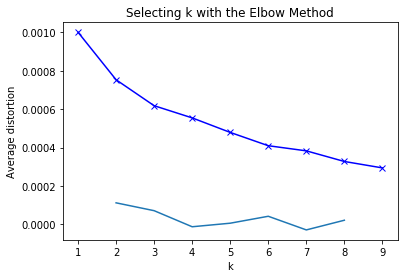

Elbow Method - num of clusters: 8
----------------------KNN---------------------------------
Score for training set: 0.895130674003
Score for validation set: 0.692781690141
Confusion Matrix: [[2003  441]
 [ 955 1145]]
Choosing by function - num of clusters: 135
----------------------KNN---------------------------------
Score for training set: 0.895130674003
Score for validation set: 0.688820422535
Confusion Matrix: [[2051  393]
 [1021 1079]]


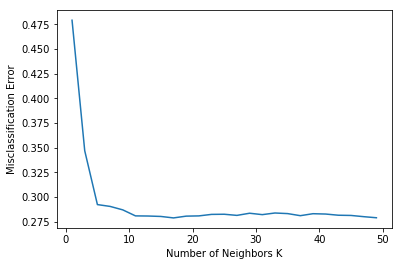

Choosing cross validation - num of clusters: 17
----------------------KNN---------------------------------
Score for training set: 0.895130674003
Score for validation set: 0.690360915493
Confusion Matrix: [[2026  418]
 [ 989 1111]]

----------------------Neural Network-learning on dataset----------------------
-----------------------------------
Training: constant learning-rate-relu
Training set score: 0.529023
Training set loss: 0.691871
-----------------------------------
Training: constant with momentum-relu
Training set score: 0.529023
Training set loss: 0.692664
-----------------------------------
Training: constant with Nesterov's momentum-relu
Training set score: 0.529023
Training set loss: 0.692312
-----------------------------------
Training: inv-scaling learning-rate-relu
Training set score: 0.529023
Training set loss: 0.691908
-----------------------------------
Training: inv-scaling with momentum-relu
Training set score: 0.529023
Training set loss: 0.691551
----------------

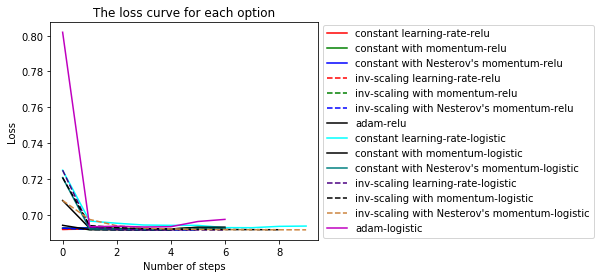

The Best model is:constant with momentum-relu
Confusion Matrix: [[2444    0]
 [2100    0]]

----------------------Neural Network-learning on dataset----------------------
-----------------------------------
Training: constant learning-rate-relu
Training set score: 0.529133
Training set loss: 0.691511
-----------------------------------
Training: constant with momentum-relu
Training set score: 0.470922
Training set loss: 0.692082
-----------------------------------
Training: constant with Nesterov's momentum-relu
Training set score: 0.529629
Training set loss: 0.691805
-----------------------------------
Training: inv-scaling learning-rate-relu
Training set score: 0.529023
Training set loss: 0.691678
-----------------------------------
Training: inv-scaling with momentum-relu
Training set score: 0.529023
Training set loss: 0.691545
-----------------------------------
Training: inv-scaling with Nesterov's momentum-relu
Training set score: 0.528968
Training set loss: 0.692850
------------

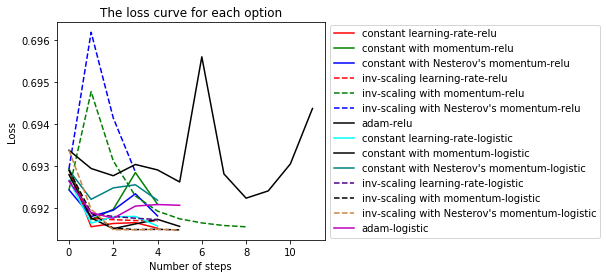

The Best model is:constant with momentum-relu
Confusion Matrix: [[   0 2444]
 [   0 2100]]


C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packa

C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packa

C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packa

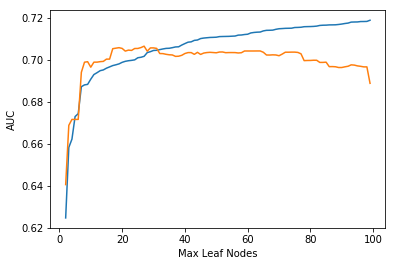

C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


The max_leaf_nodes is: 27
-------------------------------------------------------------------------------
The parameters:
{'splitter': 'best', 'criterion': 'gini'}
-------------------------------------------------------------------------------

----------------------Decision Tree------------------------------------
Training set score: 0.684017
Validation set score: 0.683759
-------------------------------------------------------------------------------
The parameters:
{'splitter': 'random', 'criterion': 'gini'}
-------------------------------------------------------------------------------

----------------------Decision Tree------------------------------------
Training set score: 0.686492
Validation set score: 0.688160
-------------------------------------------------------------------------------
The parameters:
{'splitter': 'best', 'criterion': 'entropy'}
-------------------------------------------------------------------------------

----------------------Decision Tree-------------

C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


----------------------Ensemble Learners Model---------------------------------
Score for training set: 0.654965612105
Score for validation set: 0.661751760563
Confusion Matrix: [[2128  316]
 [1221  879]]


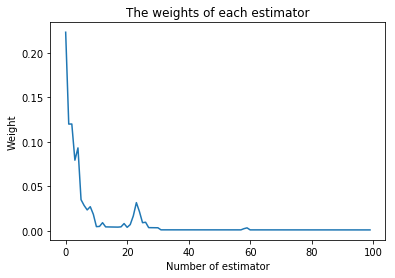

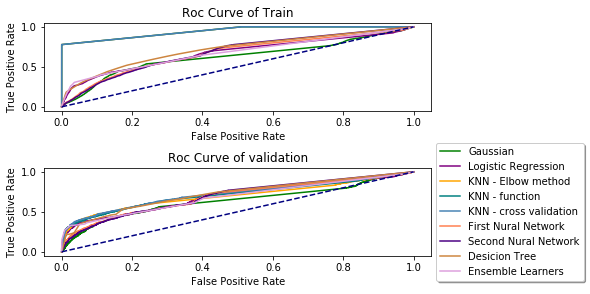

---------------------Fold number: 3 ------------------------------
All data observations: data target is balanced
Train: data target is balanced
Validation: data target is balanced


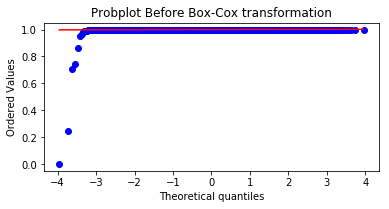

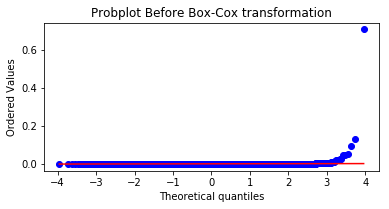

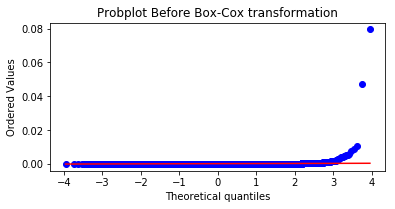

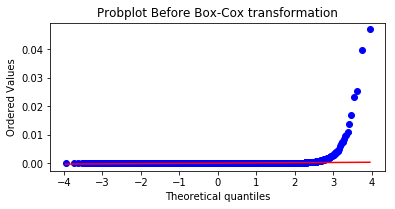

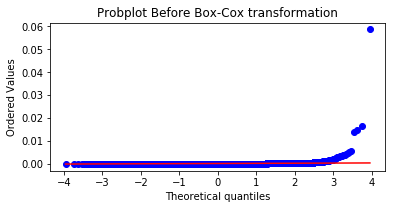

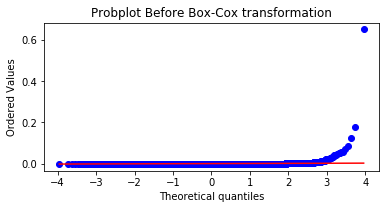

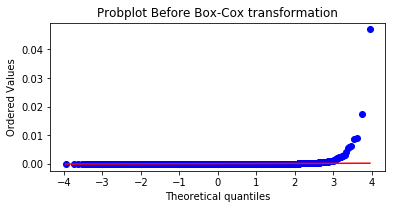

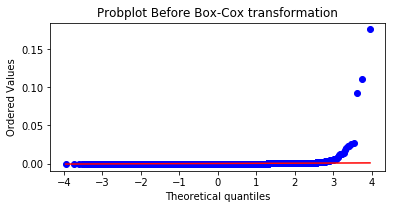

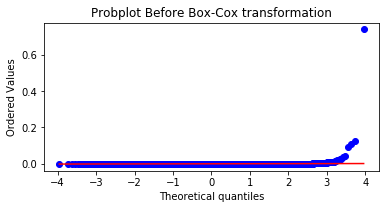

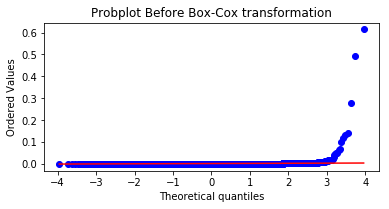

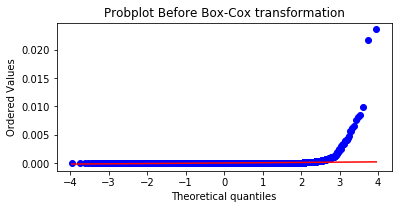

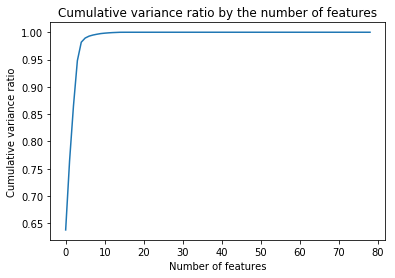

The Explained variance ratio are: [ 0.64  0.13  0.1   0.08  0.03  0.01  0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.  ]


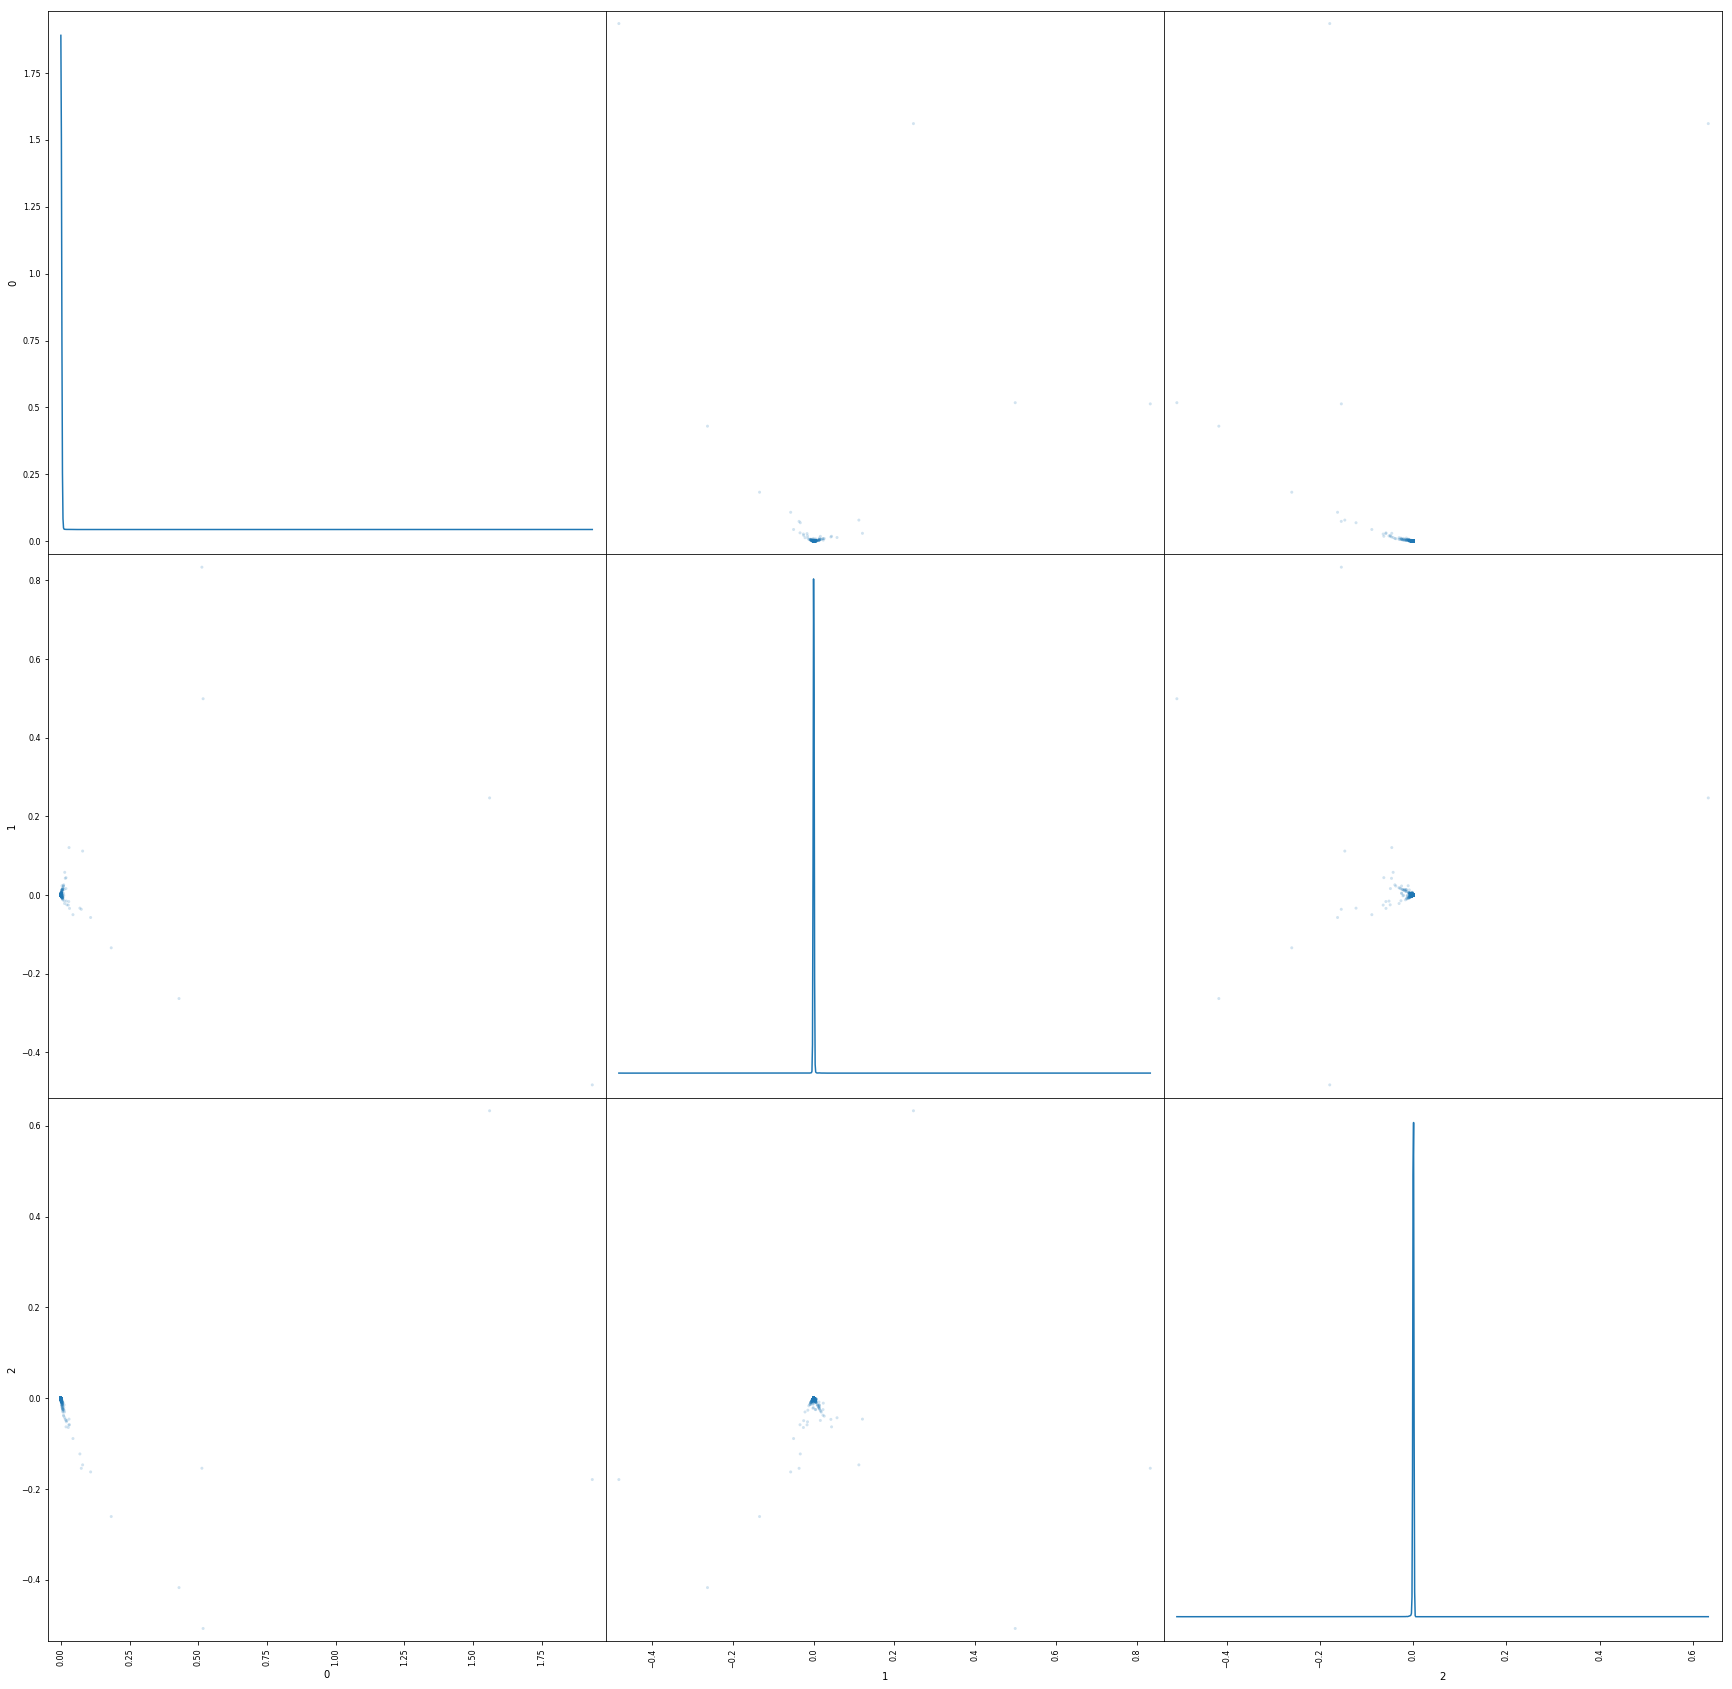

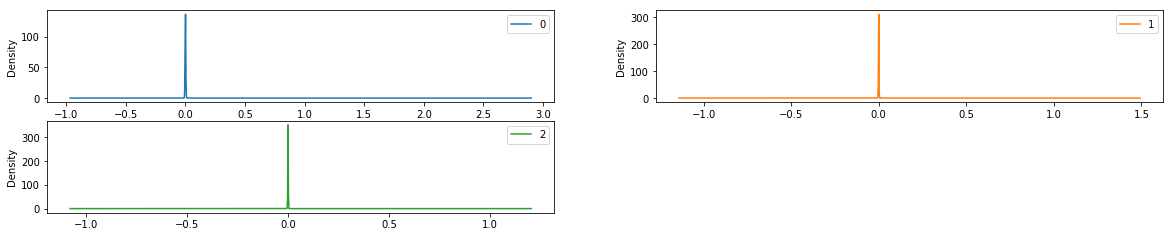

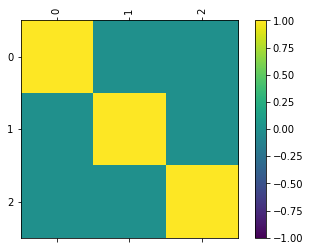

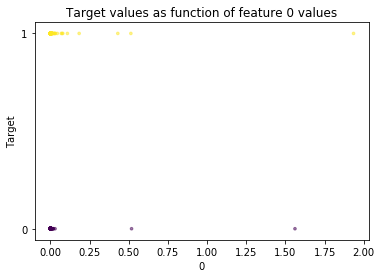

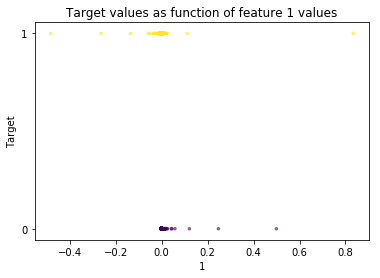

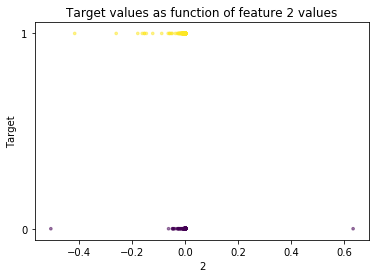

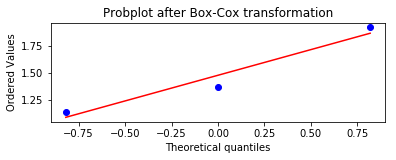

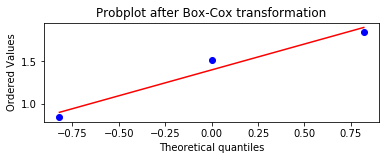

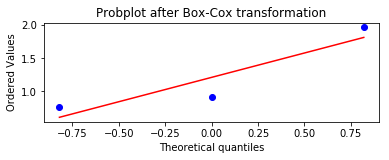

----------------------Gaussian Model---------------------------------
Score for training set: 0.582558459422
Score for validation set: 0.579665492958
Confusion Matrix: ----------------------Logistic Regression---------------------------------
Score for training set: 0.646107290234
Score for validation set: 0.655149647887
Confusion Matrix: [[2342   80]
 [1487  635]]


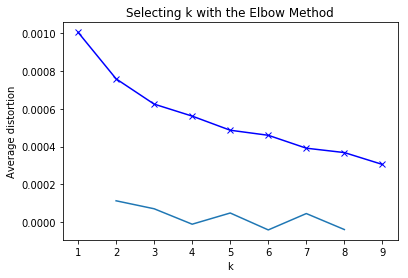

Elbow Method - num of clusters: 8
----------------------KNN---------------------------------
Score for training set: 0.89507565337
Score for validation set: 0.69014084507
Confusion Matrix: [[1979  443]
 [ 965 1157]]
Choosing by function - num of clusters: 135
----------------------KNN---------------------------------
Score for training set: 0.89507565337
Score for validation set: 0.694322183099
Confusion Matrix: [[1970  452]
 [ 937 1185]]


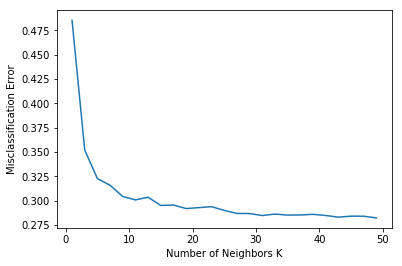

Choosing cross validation - num of clusters: 49
----------------------KNN---------------------------------
Score for training set: 0.89507565337
Score for validation set: 0.692341549296
Confusion Matrix: [[1988  434]
 [ 964 1158]]

----------------------Neural Network-learning on dataset----------------------
-----------------------------------
Training: constant learning-rate-relu
Training set score: 0.530234
Training set loss: 0.691710
-----------------------------------
Training: constant with momentum-relu
Training set score: 0.530234
Training set loss: 0.693112
-----------------------------------
Training: constant with Nesterov's momentum-relu
Training set score: 0.530234
Training set loss: 0.692413
-----------------------------------
Training: inv-scaling learning-rate-relu
Training set score: 0.530234
Training set loss: 0.691729
-----------------------------------
Training: inv-scaling with momentum-relu
Training set score: 0.530234
Training set loss: 0.691409
-----------------

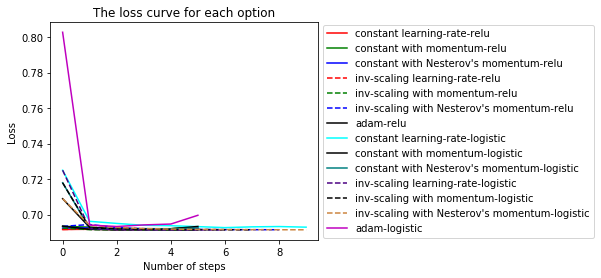

The Best model is:adam-relu
Confusion Matrix: [[2422    0]
 [2122    0]]

----------------------Neural Network-learning on dataset----------------------
-----------------------------------
Training: constant learning-rate-relu
Training set score: 0.530289
Training set loss: 0.691388
-----------------------------------
Training: constant with momentum-relu
Training set score: 0.469711
Training set loss: 0.692106
-----------------------------------
Training: constant with Nesterov's momentum-relu
Training set score: 0.469711
Training set loss: 0.691773
-----------------------------------
Training: inv-scaling learning-rate-relu
Training set score: 0.530234
Training set loss: 0.691449
-----------------------------------
Training: inv-scaling with momentum-relu
Training set score: 0.530234
Training set loss: 0.691334
-----------------------------------
Training: inv-scaling with Nesterov's momentum-relu
Training set score: 0.530234
Training set loss: 0.691363
------------------------------

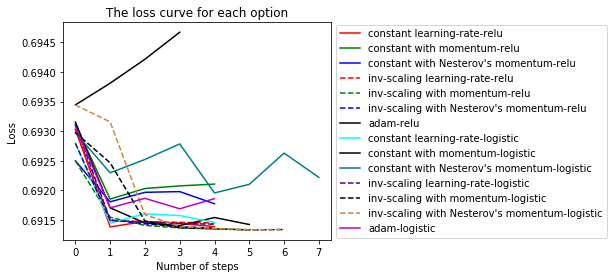

The Best model is:constant with momentum-relu
Confusion Matrix: [[   0 2422]
 [   0 2122]]


C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packa

C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packa

C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packa

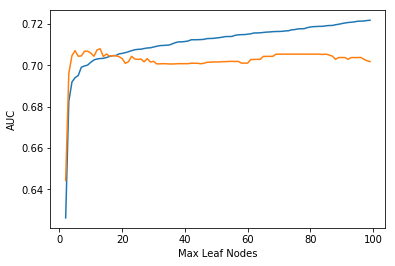

The max_leaf_nodes is: 13
-------------------------------------------------------------------------------
The parameters:
{'splitter': 'best', 'criterion': 'gini'}
-------------------------------------------------------------------------------

----------------------Decision Tree------------------------------------
Training set score: 0.679835
Validation set score: 0.685739
-------------------------------------------------------------------------------
The parameters:
{'splitter': 'random', 'criterion': 'gini'}
-------------------------------------------------------------------------------

----------------------Decision Tree------------------------------------
Training set score: 0.651939
Validation set score: 0.669014
-------------------------------------------------------------------------------
The parameters:
{'splitter': 'best', 'criterion': 'entropy'}
-------------------------------------------------------------------------------

----------------------Decision Tree-------------

C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


----------------------Ensemble Learners Model---------------------------------
Score for training set: 0.666519944979
Score for validation set: 0.681778169014
Confusion Matrix: [[2180  242]
 [1204  918]]


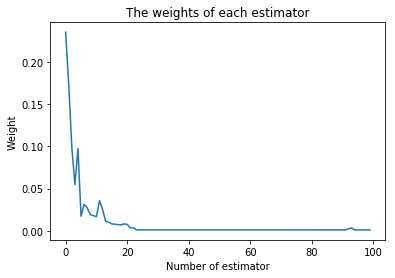

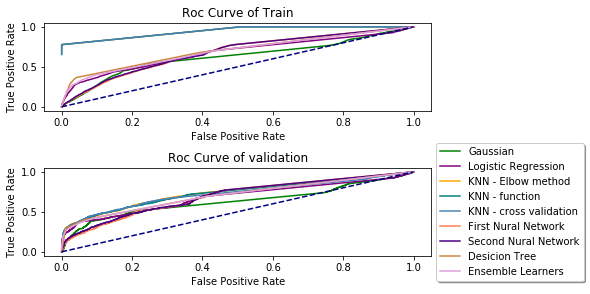

---------------------Fold number: 4 ------------------------------
All data observations: data target is balanced
Train: data target is balanced
Validation: data target is balanced


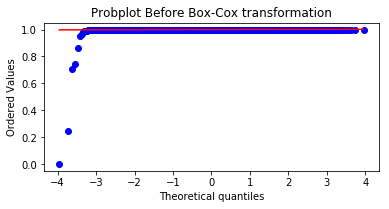

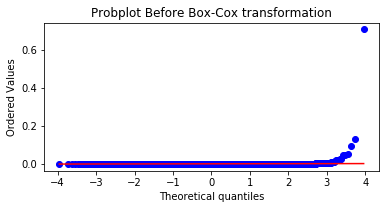

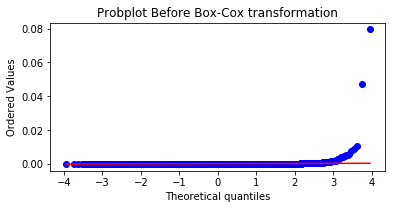

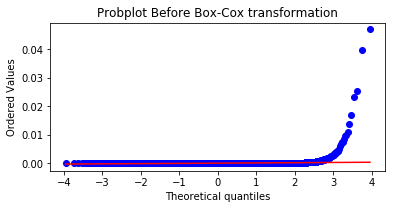

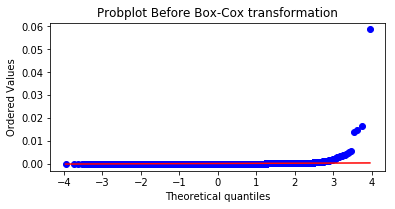

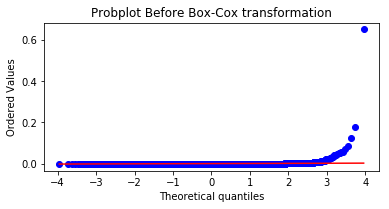

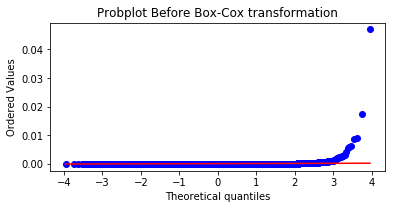

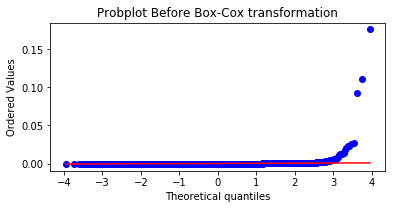

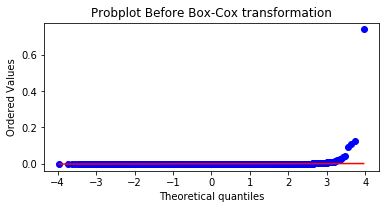

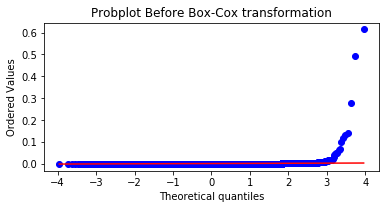

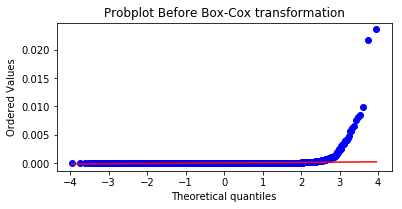

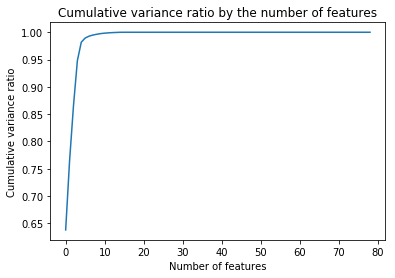

The Explained variance ratio are: [ 0.64  0.13  0.1   0.08  0.03  0.01  0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.  ]


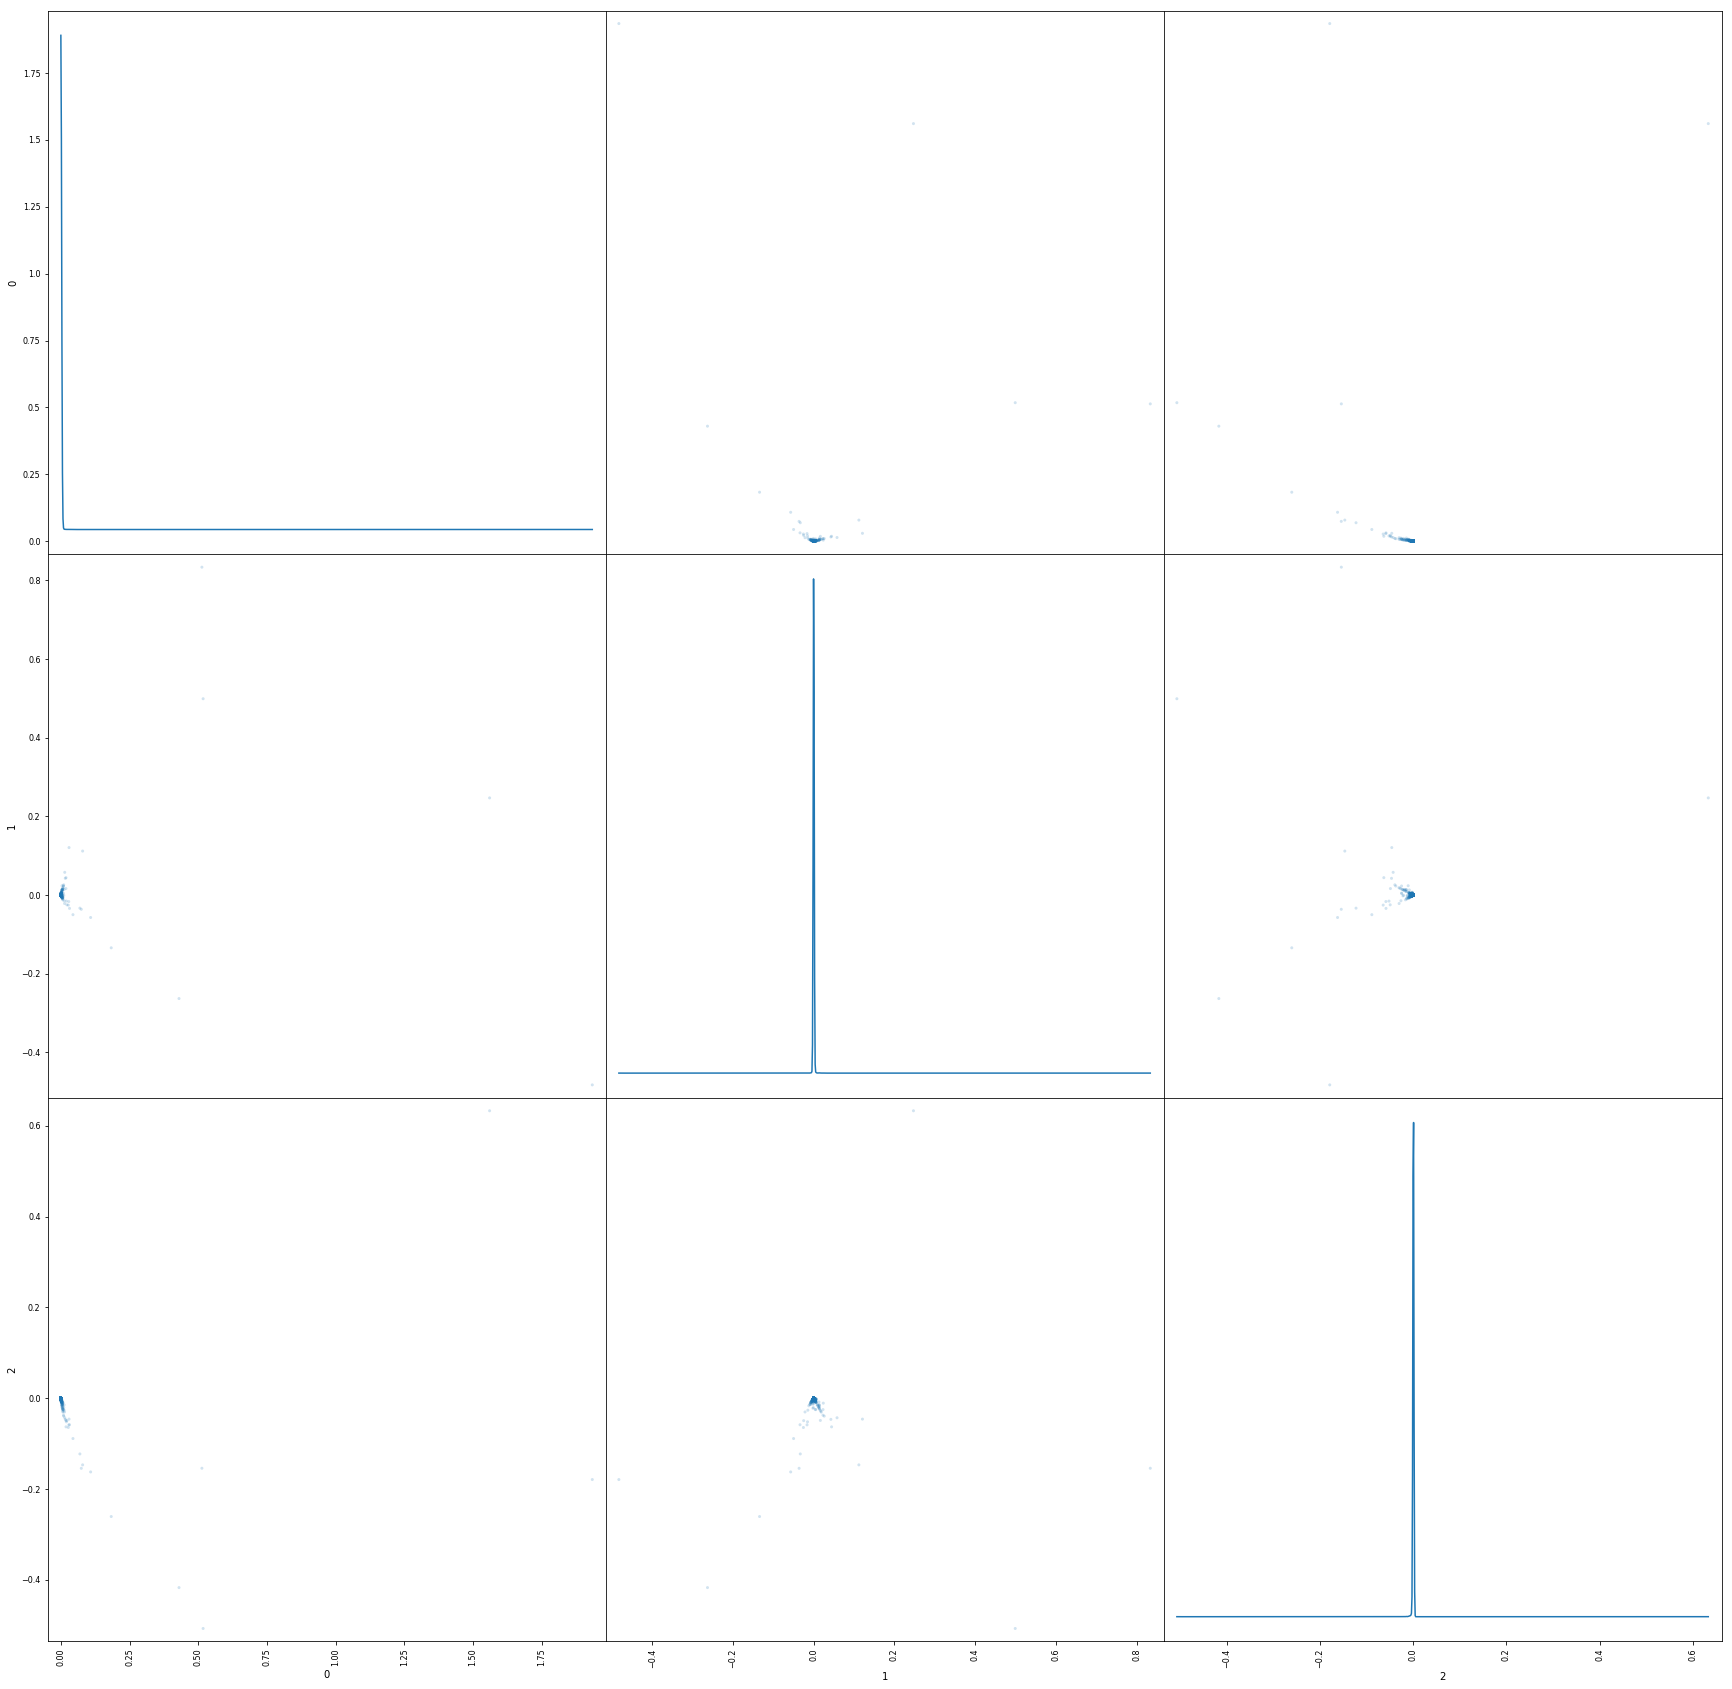

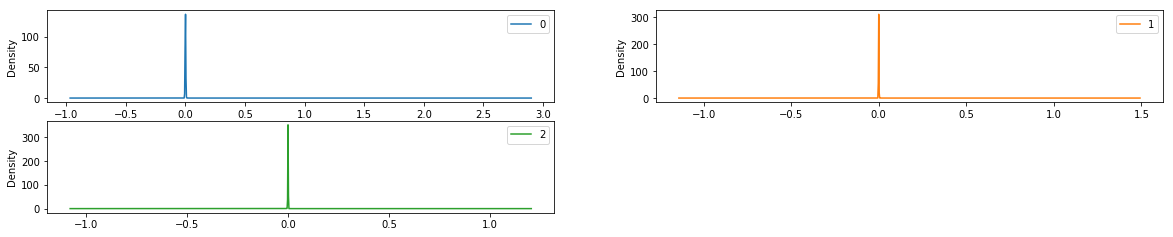

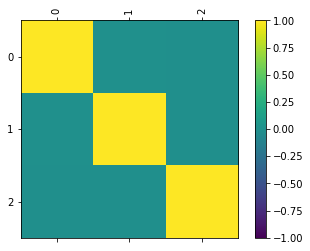

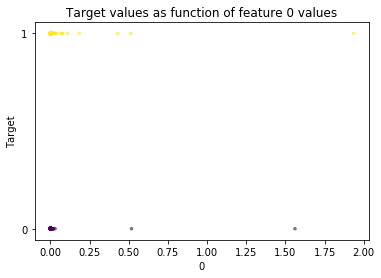

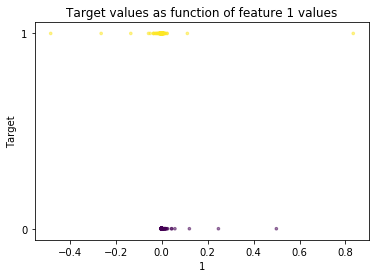

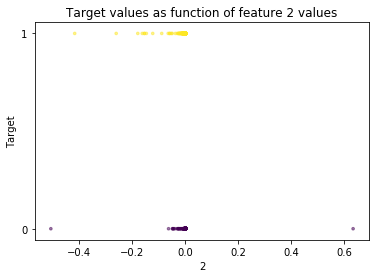

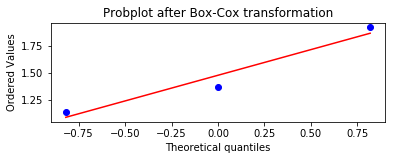

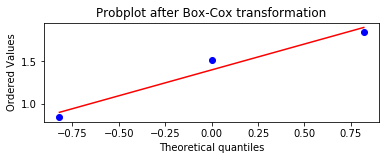

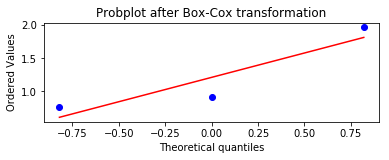

----------------------Gaussian Model---------------------------------
Score for training set: 0.590481430536
Score for validation set: 0.547315140845
Confusion Matrix: ----------------------Logistic Regression---------------------------------
Score for training set: 0.649408528198
Score for validation set: 0.626320422535
Confusion Matrix: [[2369   41]
 [1657  477]]


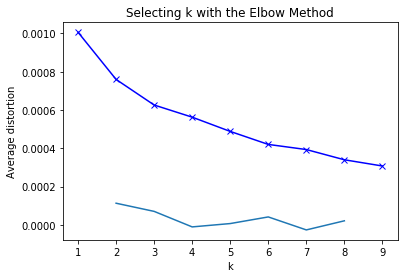

Elbow Method - num of clusters: 8
----------------------KNN---------------------------------
Score for training set: 0.892434662999
Score for validation set: 0.672095070423
Confusion Matrix: [[1853  557]
 [ 933 1201]]
Choosing by function - num of clusters: 135
----------------------KNN---------------------------------
Score for training set: 0.892434662999
Score for validation set: 0.683758802817
Confusion Matrix: [[1921  489]
 [ 948 1186]]


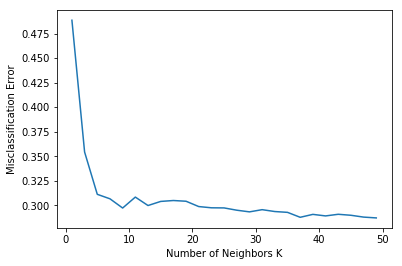

Choosing cross validation - num of clusters: 49
----------------------KNN---------------------------------
Score for training set: 0.892434662999
Score for validation set: 0.685959507042
Confusion Matrix: [[1951  459]
 [ 968 1166]]

----------------------Neural Network-learning on dataset----------------------
-----------------------------------
Training: constant learning-rate-relu
Training set score: 0.530894
Training set loss: 0.691568
-----------------------------------
Training: constant with momentum-relu
Training set score: 0.530894
Training set loss: 0.692901
-----------------------------------
Training: constant with Nesterov's momentum-relu
Training set score: 0.530894
Training set loss: 0.692255
-----------------------------------
Training: inv-scaling learning-rate-relu
Training set score: 0.530894
Training set loss: 0.691356
-----------------------------------
Training: inv-scaling with momentum-relu
Training set score: 0.530894
Training set loss: 0.691334
----------------

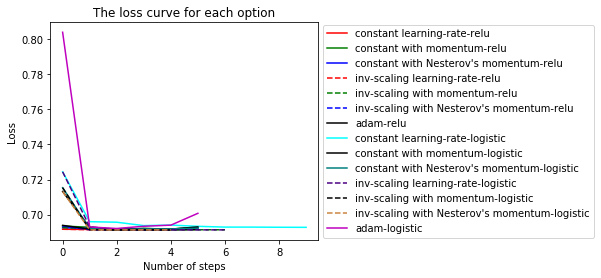

The Best model is:constant with momentum-relu
Confusion Matrix: [[2410    0]
 [2134    0]]

----------------------Neural Network-learning on dataset----------------------
-----------------------------------
Training: constant learning-rate-relu
Training set score: 0.531004
Training set loss: 0.691381
-----------------------------------
Training: constant with momentum-relu
Training set score: 0.530894
Training set loss: 0.691675
-----------------------------------
Training: constant with Nesterov's momentum-relu
Training set score: 0.530894
Training set loss: 0.691552
-----------------------------------
Training: inv-scaling learning-rate-relu
Training set score: 0.530894
Training set loss: 0.691364
-----------------------------------
Training: inv-scaling with momentum-relu
Training set score: 0.530894
Training set loss: 0.691294
-----------------------------------
Training: inv-scaling with Nesterov's momentum-relu
Training set score: 0.530894
Training set loss: 0.691294
------------

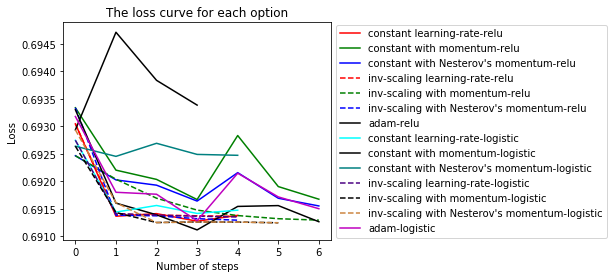

The Best model is:constant with Nesterov's momentum-relu
Confusion Matrix: [[2410    0]
 [2134    0]]


C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packa

C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packa

C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packa

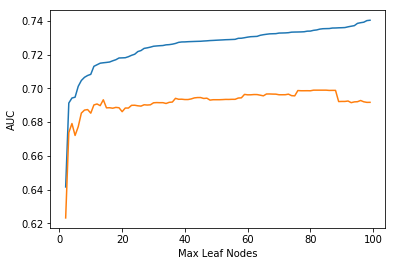

C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


The max_leaf_nodes is: 82
-------------------------------------------------------------------------------
The parameters:
{'splitter': 'best', 'criterion': 'gini'}
-------------------------------------------------------------------------------

----------------------Decision Tree------------------------------------
Training set score: 0.710812
Validation set score: 0.665493
-------------------------------------------------------------------------------
The parameters:
{'splitter': 'random', 'criterion': 'gini'}
-------------------------------------------------------------------------------

----------------------Decision Tree------------------------------------
Training set score: 0.695956
Validation set score: 0.667033
-------------------------------------------------------------------------------
The parameters:
{'splitter': 'best', 'criterion': 'entropy'}
-------------------------------------------------------------------------------

----------------------Decision Tree-------------

C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


----------------------Ensemble Learners Model---------------------------------
Score for training set: 0.671251719395
Score for validation set: 0.647887323944
Confusion Matrix: [[1911  499]
 [1101 1033]]


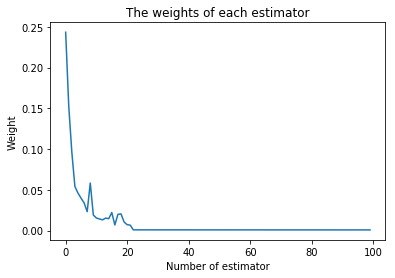

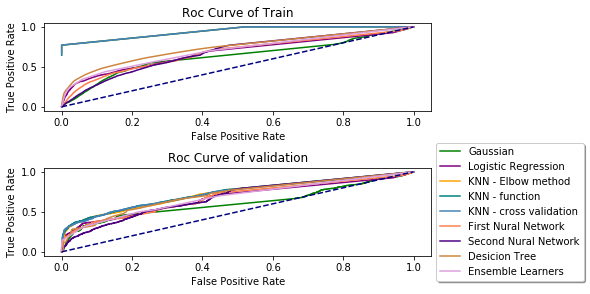

---------------------Fold number: 5 ------------------------------
All data observations: data target is balanced
Train: data target is balanced
Validation: data target is balanced


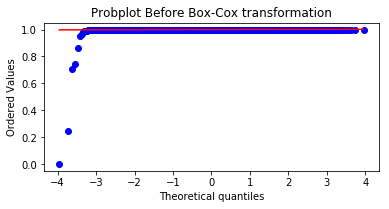

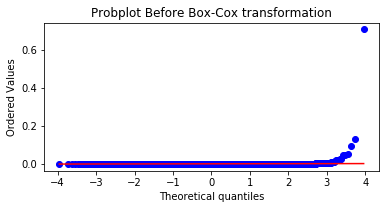

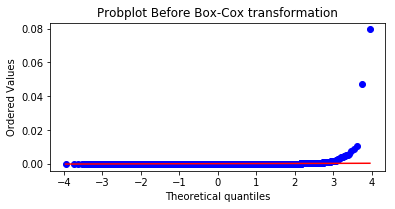

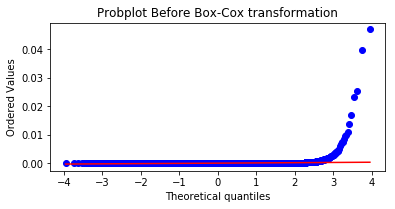

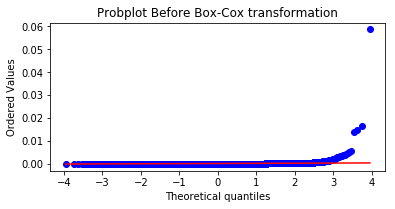

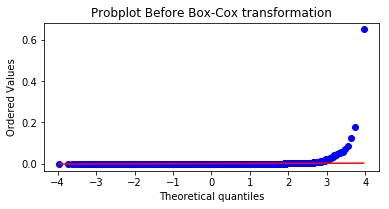

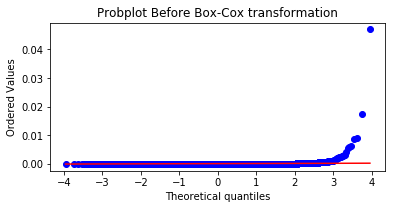

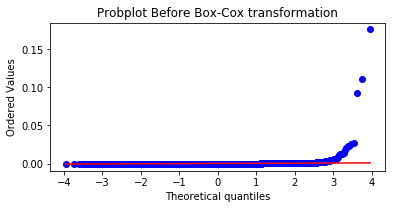

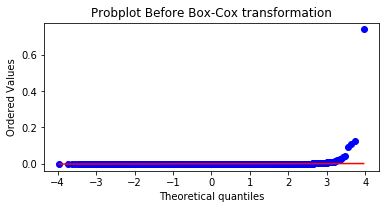

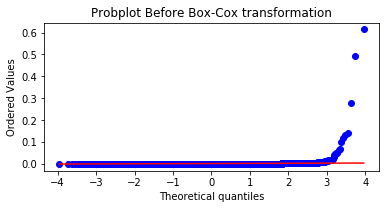

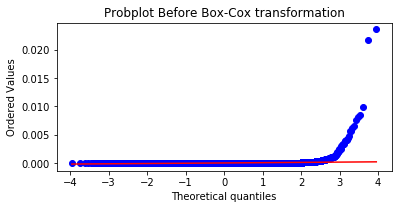

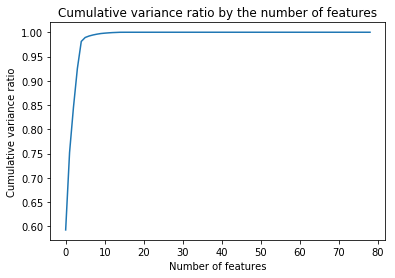

The Explained variance ratio are: [ 0.59  0.16  0.09  0.08  0.06  0.01  0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.  ]


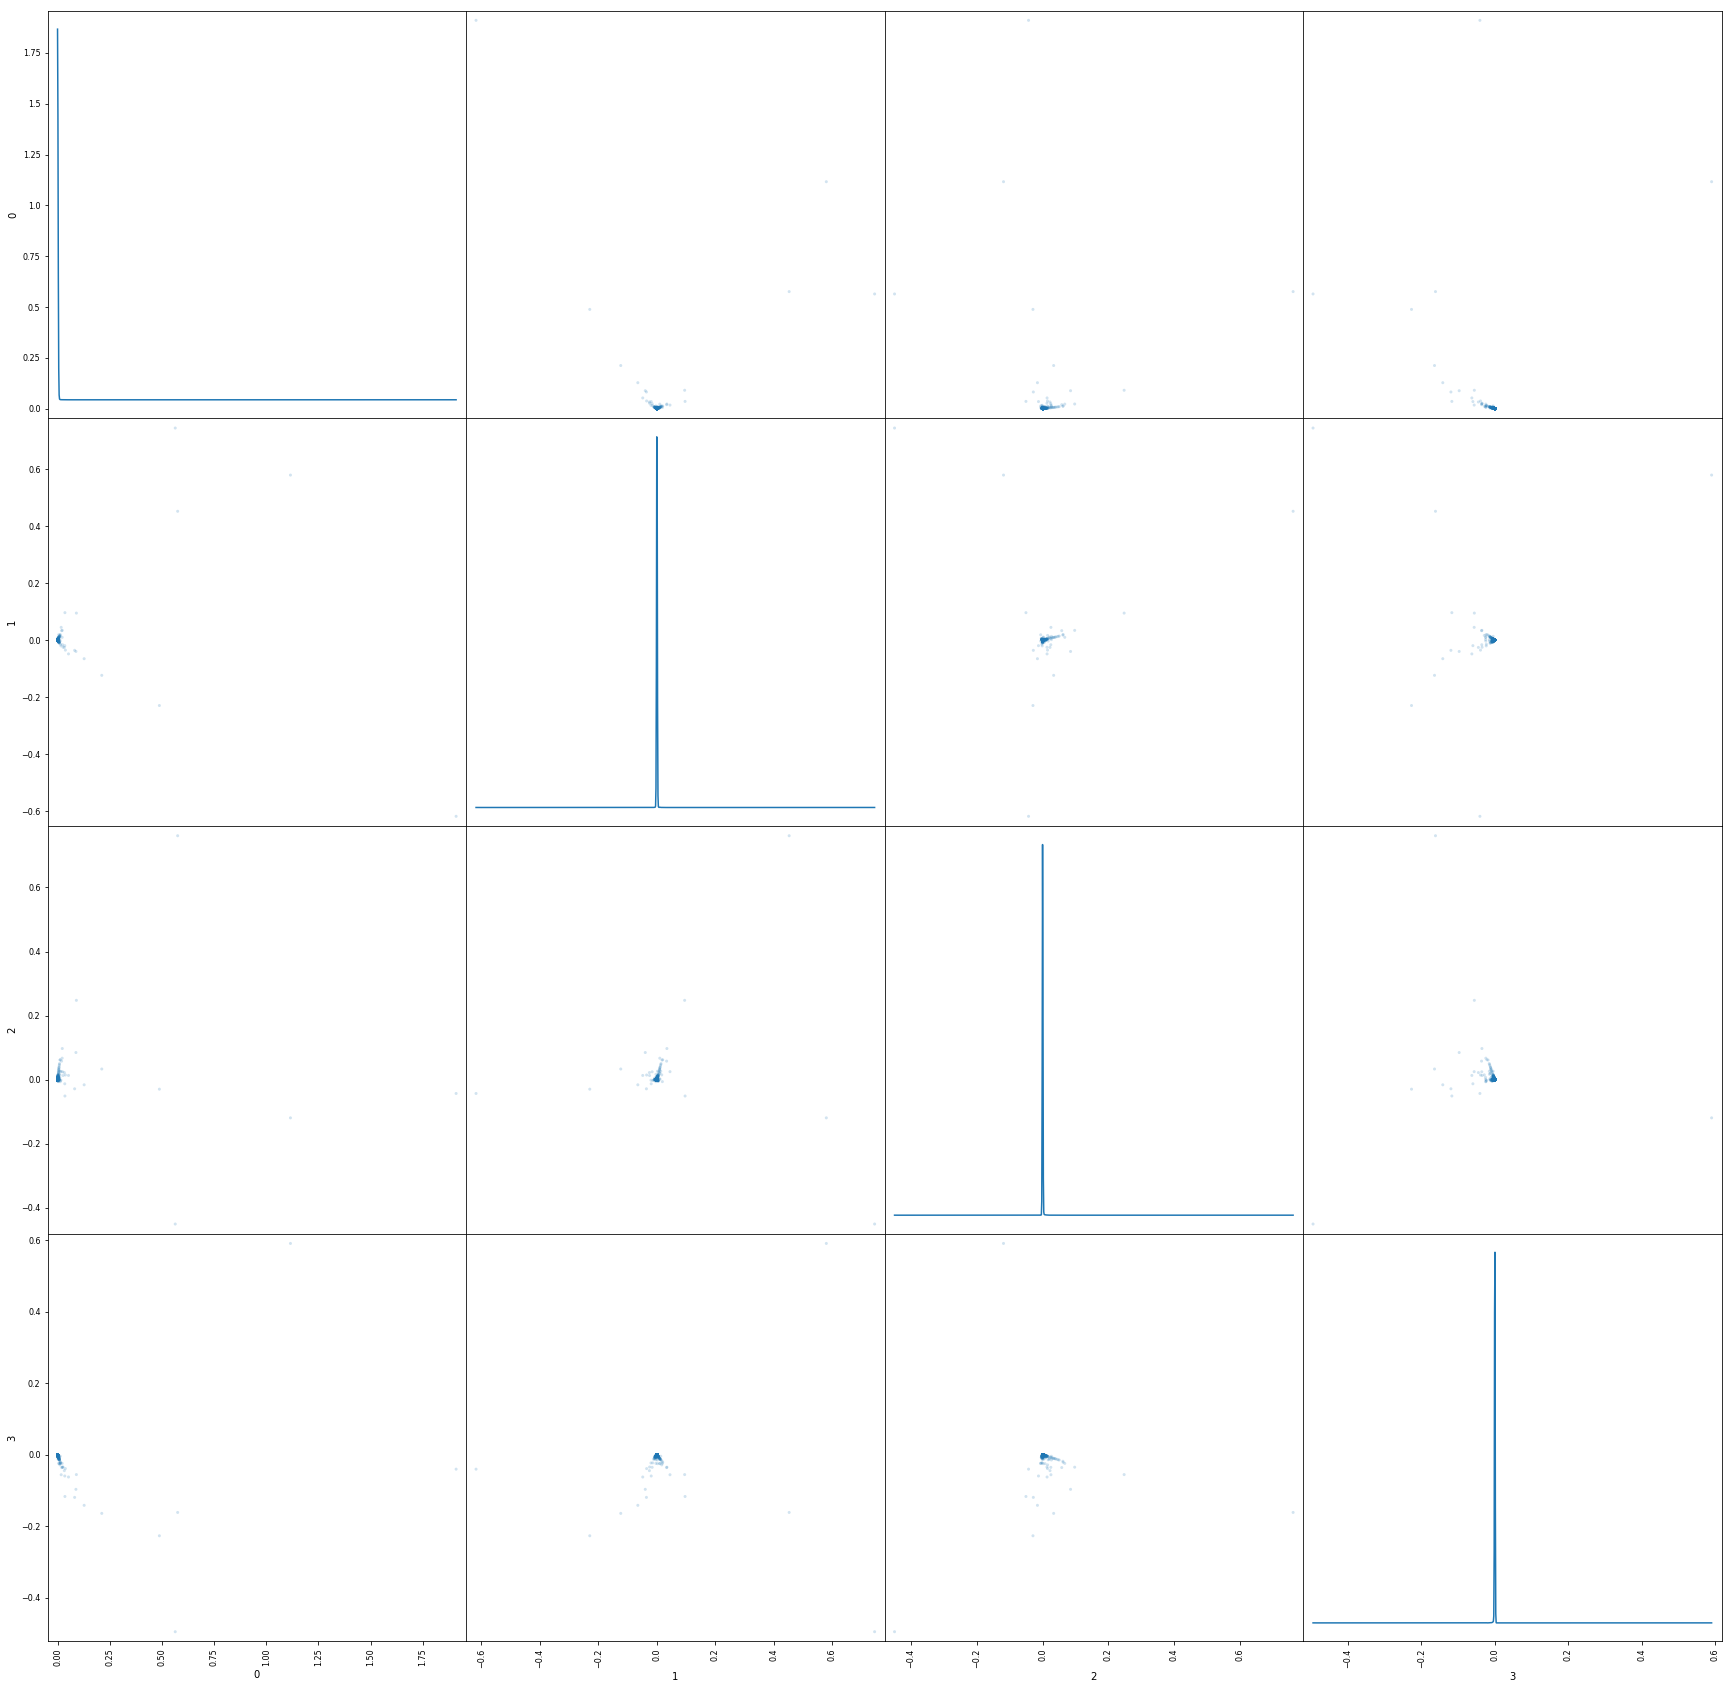

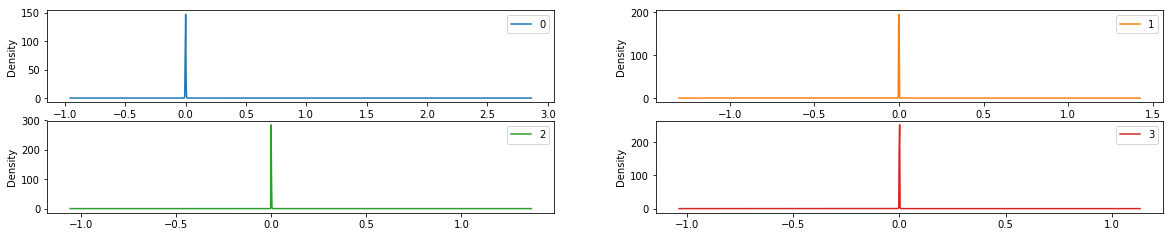

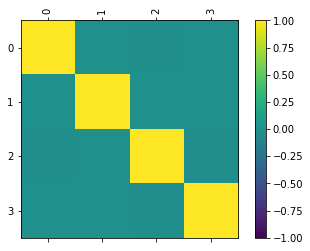

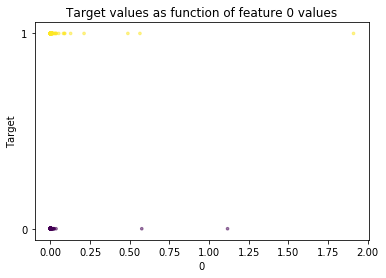

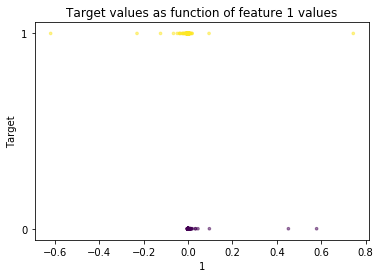

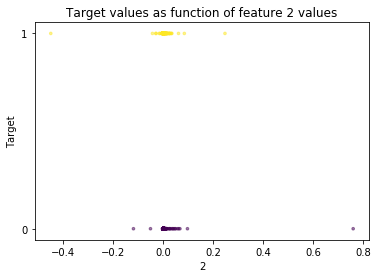

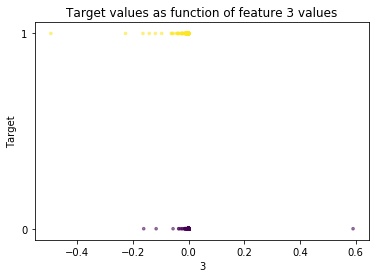

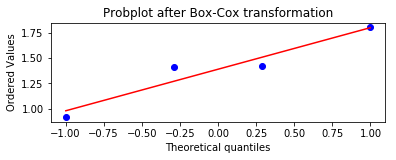

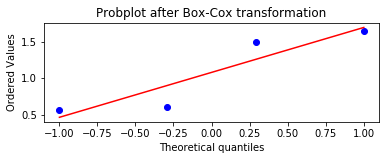

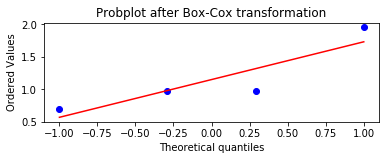

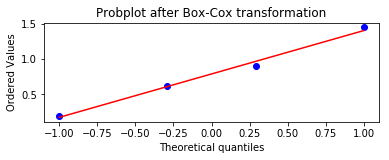

----------------------Gaussian Model---------------------------------
Score for training set: 0.609154929577
Score for validation set: 0.549196566146
Confusion Matrix: ----------------------Logistic Regression---------------------------------
Score for training set: 0.671599911972
Score for validation set: 0.637904468413
Confusion Matrix: [[2407   14]
 [1631  491]]


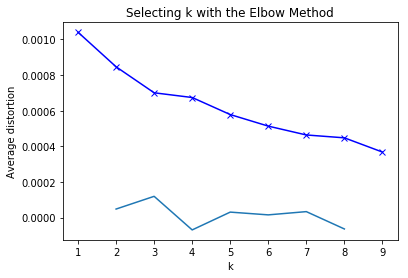

Elbow Method - num of clusters: 7
----------------------KNN---------------------------------
Score for training set: 0.894641285211
Score for validation set: 0.698877393793
Confusion Matrix: [[2054  367]
 [1001 1121]]
Choosing by function - num of clusters: 27
----------------------KNN---------------------------------
Score for training set: 0.894641285211
Score for validation set: 0.699537750385
Confusion Matrix: [[2030  391]
 [ 974 1148]]


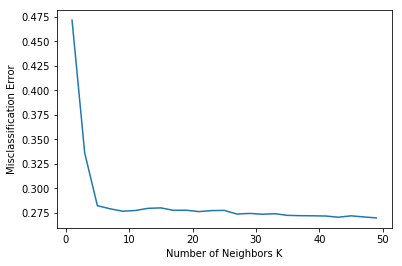

Choosing cross validation - num of clusters: 49
----------------------KNN---------------------------------
Score for training set: 0.894641285211
Score for validation set: 0.696235967422
Confusion Matrix: [[2017  404]
 [ 976 1146]]

----------------------Neural Network-learning on dataset----------------------
-----------------------------------
Training: constant learning-rate-relu
Training set score: 0.530315
Training set loss: 0.691603
-----------------------------------
Training: constant with momentum-relu
Training set score: 0.530315
Training set loss: 0.692095
-----------------------------------
Training: constant with Nesterov's momentum-relu
Training set score: 0.530315
Training set loss: 0.692292
-----------------------------------
Training: inv-scaling learning-rate-relu
Training set score: 0.530315
Training set loss: 0.691401
-----------------------------------
Training: inv-scaling with momentum-relu
Training set score: 0.530315
Training set loss: 0.691470
----------------

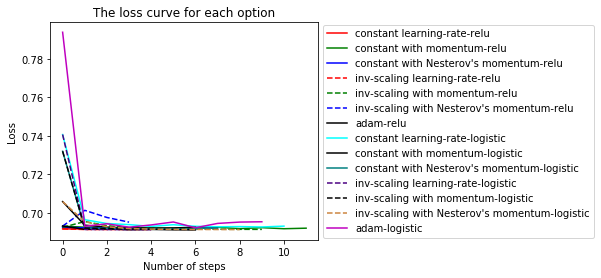

The Best model is:constant with Nesterov's momentum-relu
Confusion Matrix: [[2421    0]
 [2122    0]]

----------------------Neural Network-learning on dataset----------------------
-----------------------------------
Training: constant learning-rate-relu
Training set score: 0.530260
Training set loss: 0.691414
-----------------------------------
Training: constant with momentum-relu
Training set score: 0.530315
Training set loss: 0.692099
-----------------------------------
Training: constant with Nesterov's momentum-relu
Training set score: 0.530315
Training set loss: 0.691979
-----------------------------------
Training: inv-scaling learning-rate-relu
Training set score: 0.530260
Training set loss: 0.691446
-----------------------------------
Training: inv-scaling with momentum-relu
Training set score: 0.530315
Training set loss: 0.691377
-----------------------------------
Training: inv-scaling with Nesterov's momentum-relu
Training set score: 0.530315
Training set loss: 0.691394
-

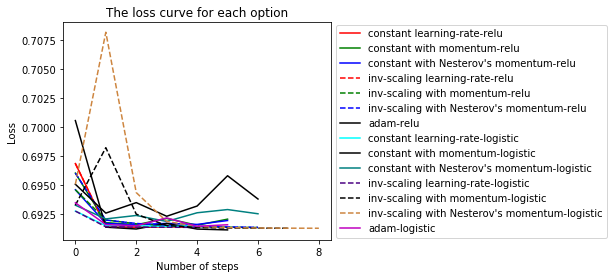

The Best model is:adam-relu
Confusion Matrix: [[2421    0]
 [2122    0]]


C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packa

C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packa

C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packa

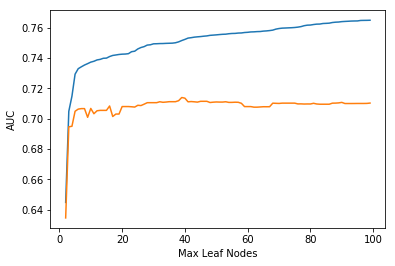

The max_leaf_nodes is: 39
-------------------------------------------------------------------------------
The parameters:
{'splitter': 'best', 'criterion': 'gini'}
-------------------------------------------------------------------------------

----------------------Decision Tree------------------------------------
Training set score: 0.710938
Validation set score: 0.671583
-------------------------------------------------------------------------------
The parameters:
{'splitter': 'random', 'criterion': 'gini'}
-------------------------------------------------------------------------------

----------------------Decision Tree------------------------------------
Training set score: 0.691076
Validation set score: 0.669381
-------------------------------------------------------------------------------
The parameters:
{'splitter': 'best', 'criterion': 'entropy'}
-------------------------------------------------------------------------------

----------------------Decision Tree-------------

C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


----------------------Ensemble Learners Model---------------------------------
Score for training set: 0.691791373239
Score for validation set: 0.664318732115
Confusion Matrix: [[1680  741]
 [ 784 1338]]


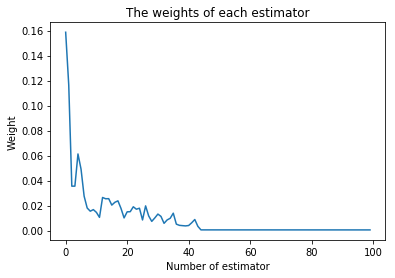

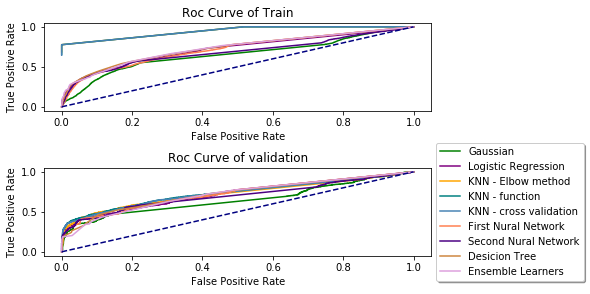

Gaussian Mean ROC (area = 0.55)
Gaussian Mean ROC (area = 0.55)
GaussianMean confusion Matrix:
[[ 1879.83333333   130.        ]
 [ 1384.66666667   392.        ]]
Logistic Regression Mean ROC (area = 0.58)
Logistic Regression Mean ROC (area = 0.59)
Logistic RegressionMean confusion Matrix:
[[ 1809.16666667   200.66666667]
 [ 1107.16666667   669.5       ]]
KNN - Elbow method Mean ROC (area = 0.78)
KNN - Elbow method Mean ROC (area = 0.60)
KNN - Elbow methodMean confusion Matrix:
[[ 1632.33333333   377.5       ]
 [  793.           983.66666667]]
KNN - function Mean ROC (area = 0.78)
KNN - function Mean ROC (area = 0.61)
KNN - functionMean confusion Matrix:
[[ 1646.16666667   363.66666667]
 [  797.33333333   979.33333333]]
KNN - cross validation Mean ROC (area = 0.78)
KNN - cross validation Mean ROC (area = 0.61)
KNN - cross validationMean confusion Matrix:
[[ 1648.66666667   361.16666667]
 [  791.83333333   984.83333333]]
First Nural Network Mean ROC (area = 0.58)
First Nural Network Mean

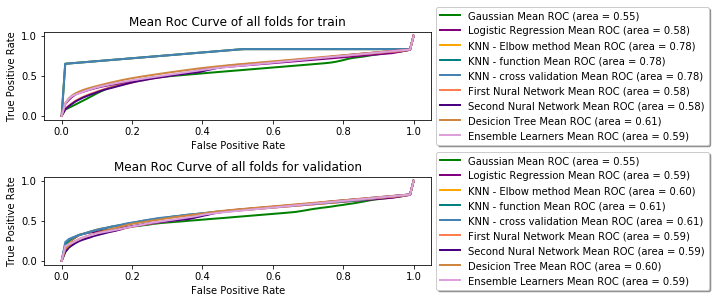

In [43]:
kfold = KFold(5, shuffle = False,random_state =0)

colors_l = ["green","purple","orange","teal","steelblue","coral","indigo","peru","plum"]

labels = [
      "Gaussian",
      "Logistic Regression",
      "KNN - Elbow method",

      "KNN - function",
      "KNN - cross validation",
      "First Nural Network",
      "Second Nural Network",
      "Desicion Tree",
      "Ensemble Learners", 
        ]

model_list_train = []
model_list_validation = []

for l,c in zip(labels,colors_l):
    model_list_train.append(mean_rpc_curve(l,c))
    model_list_validation.append(mean_rpc_curve(l,c))

# A counter to count each fold
count_fold = 1 
sum_max_leaf = 0

for train_index, validation_index in kfold.split(df_feat):
    f__train_list = []
    t__train_list=[]
    f__val_list=[]
    t__val_list=[]
    print "---------------------Fold number:",count_fold,"------------------------------"
    x_train, x_validation, y_train, y_validation = df_feat.iloc[train_index].reset_index(), df_feat.iloc[validation_index].reset_index(), (df_train['target'].iloc[train_index]).reset_index(), (df_train['target'].iloc[validation_index]).reset_index()
    y_train.drop('index', 1, inplace = True)
    y_validation.drop('index', 1, inplace = True)

    df_y_train = pd.DataFrame(y_train, columns=['target'])
    df_y_validation = pd.DataFrame(y_validation, columns=['target'])

    print "All data observations:", check_if_classes_are_balancd(df_train)
    print "Train:", check_if_classes_are_balancd(df_y_train)
    print "Validation:",check_if_classes_are_balancd(df_y_validation)
    
    #Noramalizing data for models
    x_train, x_validation = normalizing_data(x_train, x_validation)
    
    # proplot before coxbox transformation for models
    probplot_before_boxcox(x_train)
    
    # create new feature using gmm
    new_feat_train, new_feat_validation = feature_creation_gmm(x_train, x_validation)
    
    # create new features using polonomial transformations
    x_train, x_validation = feature_polonomial(x_train, x_validation)
    
    # append the features
    x_train, x_validation = append_all_features(x_train, x_validation, new_feat_train, new_feat_validation)
    
    #PCA
    pca_show_explained_variance_ratio(x_train)
    
    # Find the number of componnests that represent 90% of the data
    num_features = x_train.shape[1]
    pca = PCA(n_components=num_features)
    pca.fit(x_train)
    reduced_n_components = find_number_of_components(pca, 0.85)

    # Create the new features with reduced number of features
    new_pca = PCA(n_components=reduced_n_components)
    new_pca.fit(x_train)
    
    #train
    reduced_data_train = new_pca.transform(x_train)
    df_new_feat_train = pd.DataFrame(reduced_data_train)
    
    #validation
    reduced_data_validation = new_pca.transform(x_validation)
    df_new_feat_validation = pd.DataFrame(reduced_data_validation)
    
    #plot the new features
    scatter_matrix(df_new_feat_train, alpha=0.2, figsize=(30, 30), diagonal='kde')
    df_new_feat_train.plot(kind='density', subplots=True, layout=(10,2), sharex=False,figsize=(20,20))
    plt.show()
    plt.close()
    
    # Creating a list of all the columns names
    feat_columns_names = df_new_feat_train.columns.tolist()
    
    #plot the correlation
    corr_df1 = df_new_feat_train.corr()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr_df1, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,df_new_feat_train.shape[1],1) #need to change so could be adapted to more features
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(feat_columns_names,rotation=90)
    ax.set_yticklabels(feat_columns_names)
    plt.show()
    plt.close()
    
    #scatter plot
    for feat in feat_columns_names:
        plt.scatter(df_new_feat_train[feat],y_train,s=7, c=y_train, alpha=0.5,label="Class %s" % y_train,)
        plt.title("Target values as function of feature "+ str(feat) + " values")
        plt.xlabel(feat)
        plt.ylabel("Target")
        plt.show()
        plt.close()
    
    #boxcox transformation for gaussian  and regression models
    x_train_gaussian_regression,x_validation_gaussian_regression = proplot_after_boxCox_transformation(df_new_feat_train,df_new_feat_validation)
    
    #Gaussian
    m = gaussian_model(x_train_gaussian_regression, y_train,x_validation_gaussian_regression, y_validation)
    
    # Insert the fpr,tpr values of train and validation into lists 
    f__train_list.append(m[0])
    t__train_list.append(m[1])
    f__val_list.append(m[2])
    t__val_list.append(m[3])
    
    model_list_train[0].update_values(m[0], m[1])
    model_list_validation[0].update_values(m[2], m[3])
    
    # Update Values for calculation of mean of confusion_matix
    model_list_validation[0].list_confusion_matix += m[4]
    
    #Logistic Regression
    m = logistic_regression_model(x_train_gaussian_regression, y_train,x_validation_gaussian_regression, y_validation)
    f__train_list.append(m[0])
    t__train_list.append(m[1])
    f__val_list.append(m[2])
    t__val_list.append(m[3])
    
    model_list_train[1].update_values( m[0], m[1])
    model_list_validation[1].update_values(m[2], m[3])
    
    # Update Values for calculation of mean of confusion_matix
    model_list_validation[1].list_confusion_matix += m[4]
    
    #KNN1
    optimal_k = elbow_method(df_new_feat_train)
    m = knc_model(df_new_feat_train, y_train,df_new_feat_validation, y_validation,optimal_k)
    
    # Insert the fpr,tpr values of train and validation into lists 
    f__train_list.append(m[0])
    t__train_list.append(m[1])
    f__val_list.append(m[2])
    t__val_list.append(m[3])
    
    model_list_train[2].update_values(m[0], m[1])
    model_list_validation[2].update_values(m[2], m[3])
    
    # Update Values for calculation of mean of confusion_matix
    model_list_validation[2].list_confusion_matix += m[4]
    
    #KNN2
    optimal_k = choosing_k_by_function(df_new_feat_train)
    m  = knc_model(df_new_feat_train, y_train,df_new_feat_validation, y_validation,optimal_k)
    
    # Insert the fpr,tpr values of train and validation into lists 
    f__train_list.append(m[0])
    t__train_list.append(m[1])
    f__val_list.append(m[2])
    t__val_list.append(m[3])
    
    model_list_train[3].update_values(m[0], m[1])
    model_list_validation[3].update_values(m[2], m[3])
    
    # Update Values for calculation of mean of confusion_matix
    model_list_validation[3].list_confusion_matix += m[4]
    
    #KNN3
    optimal_k = cross_validation_k(df_new_feat_train, np.ravel(y_train))
    m  = knc_model(df_new_feat_train, y_train,df_new_feat_validation, y_validation,optimal_k)
    
    # Insert the fpr,tpr values of train and validation into lists 
    f__train_list.append(m[0])
    t__train_list.append(m[1])
    f__val_list.append(m[2])
    t__val_list.append(m[3])
    
    model_list_train[4].update_values(m[0], m[1])
    model_list_validation[4].update_values(m[2], m[3])
    
    # Update Values for calculation of mean of confusion_matix
    model_list_validation[4].list_confusion_matix += m[4] 
    
    #Neural Network
    num_observation = df_new_feat_train.shape[0]
    num_of_classes = df_new_feat_train.shape[1]

    #first option
    num_of_neurons_first_hiddn_layer = int(2*np.sqrt((num_of_classes+2)*num_observation)+2*np.sqrt(num_observation/(num_of_classes+2)))
    num_of_neurons_second_hiddn_layer = int(num_of_classes*np.sqrt(num_observation/(num_of_classes+2)))
    h_l_s = (num_of_neurons_first_hiddn_layer,num_of_neurons_second_hiddn_layer)
    
    m = neural_network_model(df_new_feat_train, y_train,df_new_feat_validation, y_validation, h_l_s)
    
    # Insert the fpr,tpr values of train and validation into lists 
    f__train_list.append(m[0])
    t__train_list.append(m[1])
    f__val_list.append(m[2])
    t__val_list.append(m[3])
    
    model_list_train[5].update_values(m[0], m[1])
    model_list_validation[5].update_values(m[2], m[3])

    # Update Values for calculation of mean of confusion_matix
    model_list_validation[5].list_confusion_matix += m[4]
    
    #second option
    num_of_neurons_in_hiddn_layer = int(math.log(num_observation))
    h_l_s = (num_of_neurons_in_hiddn_layer,)
    
    m = neural_network_model(df_new_feat_train, y_train,df_new_feat_validation, y_validation, h_l_s)
    
    # Insert the fpr,tpr values of train and validation into lists 
    f__train_list.append(m[0])
    t__train_list.append(m[1])
    f__val_list.append(m[2])
    t__val_list.append(m[3])
    
    model_list_train[6].update_values(m[0], m[1])
    model_list_validation[6].update_values(m[2], m[3])
                                      
    # Update Values for calculation of mean of confusion_matix
    model_list_validation[6].list_confusion_matix += m[4] 
    
    #Decision Tree
    pram_max_leaf = decision_tree_max_leaf(df_new_feat_train, y_train, df_new_feat_validation, y_validation)
    m = decision_tree_model(df_new_feat_train, y_train,df_new_feat_validation ,y_validation, pram_max_leaf)
    sum_max_leaf+=pram_max_leaf
    
    # Insert the fpr,tpr values of train and validation into lists 
    f__train_list.append(m[0])
    t__train_list.append(m[1])
    f__val_list.append(m[2])
    t__val_list.append(m[3])

    model_list_train[7].update_values(m[0], m[1])
    model_list_validation[7].update_values(m[2], m[3])
                                      
    # Update Values for calculation of mean of confusion_matix                       
    model_list_validation[7].list_confusion_matix += m[4] 
    
    m = ensemble_learners_model(df_new_feat_train, y_train,df_new_feat_validation,y_validation)
    
    # Insert the fpr,tpr values of train and validation into lists 
    f__train_list.append(m[0])
    t__train_list.append(m[1])
    f__val_list.append(m[2])
    t__val_list.append(m[3]) 
    
    model_list_train[8].update_values(m[0], m[1])
    model_list_validation[8].update_values(m[2], m[3])
                                      
    # Update Values for calculation of mean of confusion_matix                                  
    model_list_validation[8].list_confusion_matix += m[4] 
    
    count_fold+=1
    
    fig, (ax1, ax2) = plt.subplots(2,1)
    figsize=(15, 10)
    for ft,tt,fv,tv,c,label in zip(f__train_list,t__train_list,f__val_list,t__val_list,colors_l,labels):
        lab_t =  label+' Mean ROC (area = %0.2f)'% metrics.auc(ft,tt)
        lab_v =  label+' Mean ROC (area = %0.2f)'% metrics.auc(fv,tv)
        ax1.plot(ft,tt, color=c, label=label)
        ax2.plot(fv,tv, color=c, label=label)
    
    box = ax1.get_position()
    ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    box2 = ax2.get_position()
    ax2.set_position([box2.x0, box2.y0, box2.width * 0.8, box2.height])
    
    ax1.plot([0, 1], [0, 1], color='navy', linestyle='--') #The random guess line
    ax2.plot([0, 1], [0, 1], color='navy', linestyle='--') #The random guess line 
    
    #legend
    ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5),  shadow=True)
    
    # Labels for plots 
    ax1.set_title('Roc Curve of Train')
    ax2.set_title('Roc Curve of validation') 
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)   
    plt.show()
    
# Plot the Mean ROC of each model
fig2, (ax3, ax4) = plt.subplots(2,1)
figsize=(15, 10)
for m_t,m_v in zip(model_list_train,model_list_validation):
    m_t.mean_tpr /= count_fold
    m_t.mean_tpr[-1] = 1.0
    m_v.mean_tpr /= count_fold
    m_v.mean_tpr[-1] = 1.0
    mean_auc_t = auc(m_t.mean_fpr, m_t.mean_tpr)
    mean_auc_v = auc(m_v.mean_fpr, m_v.mean_tpr)
    lab_t =  m_t.label+' Mean ROC (area = %0.2f)'% mean_auc_t
    lab_v =  m_t.label+' Mean ROC (area = %0.2f)'% mean_auc_v
    ax3.plot(m_t.mean_fpr, m_t.mean_tpr, color= m_t.color,label=lab_t, lw=2)
    ax4.plot(m_v.mean_fpr, m_v.mean_tpr, color= m_v.color,label=lab_v, lw=2)
    print lab_t 
    print lab_v 
    print m_t.label + 'Mean confusion Matrix:'
    print m_v.list_confusion_matix/count_fold

ax3.set_xlim([-0.05, 1.05])
ax3.set_ylim([-0.05, 1.05])
ax4.set_xlim([-0.05, 1.05])
ax4.set_ylim([-0.05, 1.05])

# Labels for plots 
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax4.set_xlabel('False Positive Rate')
ax4.set_ylabel('True Positive Rate')
ax3.set_title('Mean Roc Curve of all folds for train')
ax4.set_title('Mean Roc Curve of all folds for validation')

# Legend
#ax4.legend(loc='center left',bbox_to_anchor=(1, 0.5))
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5),  shadow=True)
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5),  shadow=True)

# Shrink current axis by 20%
box1 = ax3.get_position()
ax3.set_position([box1.x0, box1.y0, box1.width * 0.8, box1.height])
box2 = ax4.get_position()
ax4.set_position([box2.x0, box2.y0, box2.width * 0.8, box2.height])
  
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)    
    
plt.show()


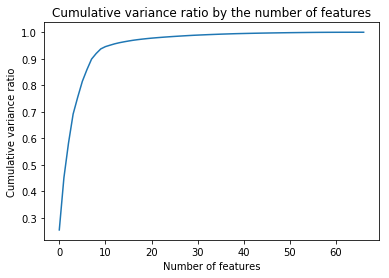

The Explained variance ratio are: [ 0.25  0.2   0.13  0.11  0.06  0.06  0.04  0.04  0.02  0.02  0.01  0.01
  0.01  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.  ]


C:\Users\or\Anaconda2\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


In [42]:
x_train = df_feat.copy()
y_train = df_train['target'] 

#Noramalizing data for models
x_train, x_test = normalizing_data(x_train, x_test)

# create new feature using gmm
new_feat_train, new_feat_test = feature_creation_gmm(x_train, x_test)

# create new features using polonomial transformations
x_train, x_test = feature_polonomial(x_train, x_test)

# append the features
x_train, x_test = append_all_features(x_train, x_test, new_feat_train, new_feat_test)

#PCA
pca_show_explained_variance_ratio(x_train)

# Find the number of componnests that represent 90% of the data
num_features = x_train.shape[1]
pca = PCA(n_components=num_features)
pca.fit(x_train)
reduced_n_components = find_number_of_components(pca, 0.9)

# Create the new features with reduced number of features
new_pca = PCA(n_components=reduced_n_components)
new_pca.fit(x_train)

#train
reduced_data_train = new_pca.transform(x_train)
df_new_feat_train = pd.DataFrame(reduced_data_train)

#test
reduced_data_test = new_pca.transform(x_test)
df_new_feat_test = pd.DataFrame(reduced_data_test)

#Decision Tree
dtc = DecisionTreeClassifier(
                         max_depth=900,  
                         min_samples_split=2, 
                         min_samples_leaf=2, 
                         max_features=None, 
                         max_leaf_nodes=int(sum_max_leaf/count_fold), 
                         min_impurity_split=1e-7, 
                         random_state=42, criterion='entropy',splitter='random')
dtc.fit(df_new_feat_train, y_train)
    
y_prob_test = dtc.predict_proba(df_new_feat_test)[:,1]
(pd.DataFrame(y_prob_test)).to_csv("Submission_results.csv", header=["prediction"])
